<a href="https://colab.research.google.com/github/SqweeksOp/AV-Job-a-thon/blob/main/ADS_training_retailer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl

import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path="/content/drive/MyDrive/Project_data/ADS_policy/Retailer/Train/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/ADS_policy/Retailer/Train"):
    if filename.endswith(".csv"):
      if count==0:
        df1=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df1=df1.append(df)
      if count==2000:
        break
      count+=1
print(count)

Loading Data...
2000


In [ ]:
import os
path="/content/drive/MyDrive/Project_data/ADS_policy/Retailer/Test/"
count=0
print("Loading Data...")
for filename in os.listdir("/content/drive/MyDrive/Project_data/ADS_policy/Retailer/Test"):
    if filename.endswith(".csv"):
      if count==0:
        df_test=pd.read_csv(path+filename,index_col=0)
      else:
        df=pd.read_csv(path+filename,index_col=0)
        df_test=df_test.append(df)
      if count==500:
        break
      count+=1
print(count)

Loading Data...
499


In [ ]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               69.0  ...         0.0        0.0
4   4.0               72.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               79.0  ...         0.0        0.0
4   4.0               85.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [ ]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

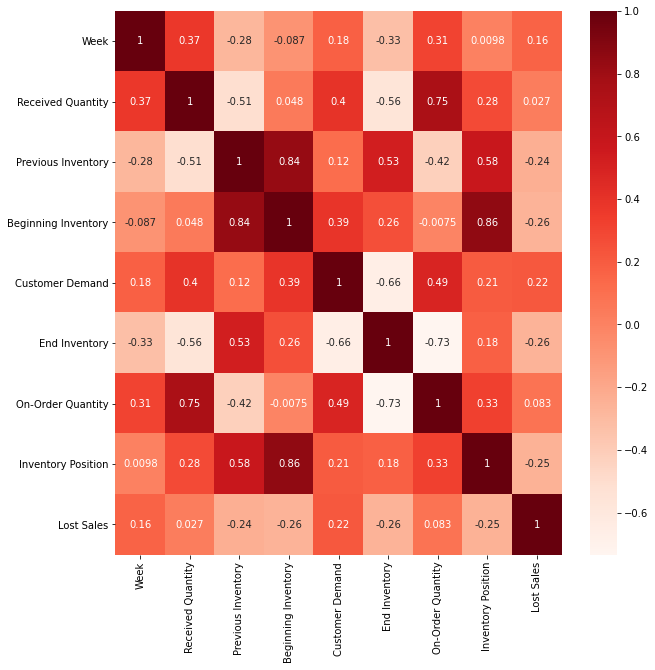

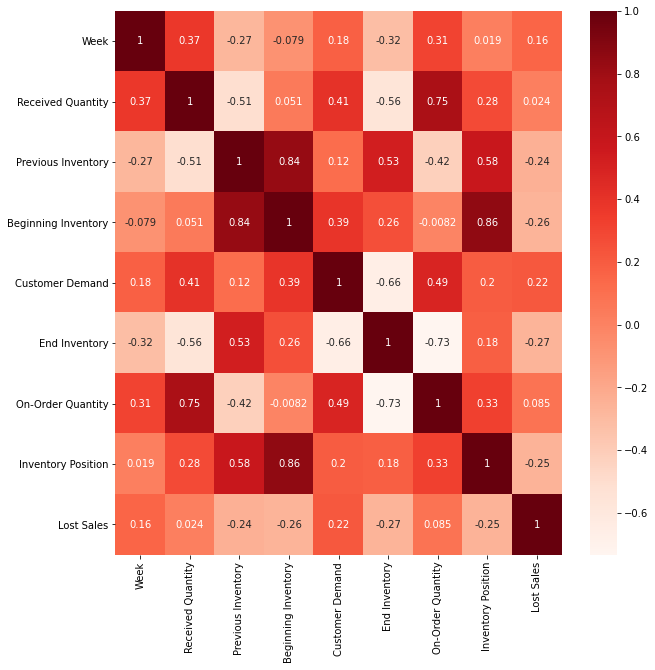

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [ ]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [ ]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
0   0.0                0.0  ...                 0.0         0.0
1   1.0                0.0  ...               131.0         0.0
2   2.0                0.0  ...               125.0         0.0
3   3.0               69.0  ...               137.0         0.0
4   4.0               72.0  ...               109.0         0.0

[5 rows x 9 columns]

In [ ]:
X_train.shape

(104052, 9)

In [ ]:
X_test.shape

(25948, 9)

- Correlation


In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8211 (7.89% of total)



In [ ]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 25948
    Positive: 2156 (8.31% of total)



In [ ]:
!pip install imbalanced-learn

In [ ]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [ ]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95841, 1: 8211})


Counter({0: 23792, 1: 2156})

OVER and Under Sampling pipeline

OVER SAMPLING

In [ ]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.50)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95841, 1: 47920})


UNDER SAMPLING

In [ ]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 47920, 1: 47920})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
95830  1
95831  1
95832  1
95833  1
95834  1
95835  1
95836  1
95837  1
95838  1
95839  1

In [ ]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6           7          8
95810  29.000000  76.905763  15.094237  ...  84.811525   99.858644   0.000000
95811  16.375234  83.749844  24.749844  ...  70.375234   95.000000   0.000000
95812  43.000000  73.251804   7.622294  ...  72.251804   72.251804   1.251804
95813   3.133695  62.069564  43.529350  ...  77.000000   91.000000   0.000000
95814  42.640830  79.820415  12.000000  ...  79.000000   79.000000   0.538755
95815  26.872070  91.624023   0.000000  ...  84.120117   90.872070   0.000000
95816  48.000000  85.968165   0.000000  ...  84.031835   84.031835   5.000000
95817  45.495064  76.252468  14.747532  ...  83.747532   94.000000   0.000000
95818  37.000000  72.162212   2.081106  ...  78.000000   86.000000   0.000000
95819  44.871820  73.743640   1.128180  ...  75.000000   75.000000   4.000000
95820  43.348563  73.954310   3.697127  ...  78.348563   82.651437   0.000000
95821  22.255117  81.744883  22.503411  ...  73.510234  101.006823   0.000000
95822  28.417421  72.569570   0.860860  ...  76.569570   89.569570   0.000000
95823  35.000000  79.050609  10.424086  ...  78.525305   78.525305   6.474695
95824  46.918761  76.837522   0.000000  ...  77.000000   87.000000   0.000000
95825  28.516207  78.344138  16.000000  ...  72.344138   89.688276   0.000000
95826   7.641431  85.589642  11.820715  ...  82.231073   96.231073   0.000000
95827  45.076341  74.000000   0.000000  ...  84.076341   84.076341  19.076341
95828  41.708295  82.468779  20.177074  ...  73.822926   93.000000   0.000000
95829  20.000000  75.098073  26.901927  ...  81.509633   95.803853   0.000000
95830  36.000000  73.001392   0.000000  ...  78.998608   78.998608   3.000000
95831  28.800245  72.600082   0.000000  ...  76.000000   76.000000  15.399918
95832  43.749935  73.750195   2.249805  ...  86.749935   86.749935  12.250065
95833  24.127923  80.872077   0.563961  ...  81.000000   81.000000  11.436039
95834  30.000000  81.817530   0.182470  ...  85.000000   96.635060   0.000000
95835  33.396826  68.603174   0.000000  ...  78.396826   78.396826  13.000000
95836   8.880198  78.520794  26.359405  ...  79.760397  104.880198   0.000000
95837  36.577088  80.577088  13.000000  ...  73.154176   84.577088   0.000000
95838  18.000000  76.175870   1.549420  ...  79.000000   91.000000   0.000000
95839  46.199894  83.000000   0.000000  ...  83.000000   83.000000   1.800106

[30 rows x 9 columns]

In [ ]:
X_train.shape

(95840, 9)

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 95840
    Positive: 47920 (50.00% of total)



In [ ]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_df.shape

(86256, 9)

In [ ]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 86256
    Positive: 43156 (50.03% of total)



In [ ]:
a=pd.DataFrame(bool_train_labels)
a.shape

(86256, 1)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (86256,)
Validation labels shape: (9584,)
Test labels shape: (25948,)
Training features shape: (86256, 9)
Validation features shape: (9584, 9)
Test features shape: (25948, 9)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.662627093243932,
 3: 0.7967750870005675,
 4: 0.8904140353941062,
 5: 0.9540920728700836,
 6: 0.9912875905777182,
 7: 0.9998727019591199,
 8: 0.9999899012100621,
 9: 0.9999999999999998}

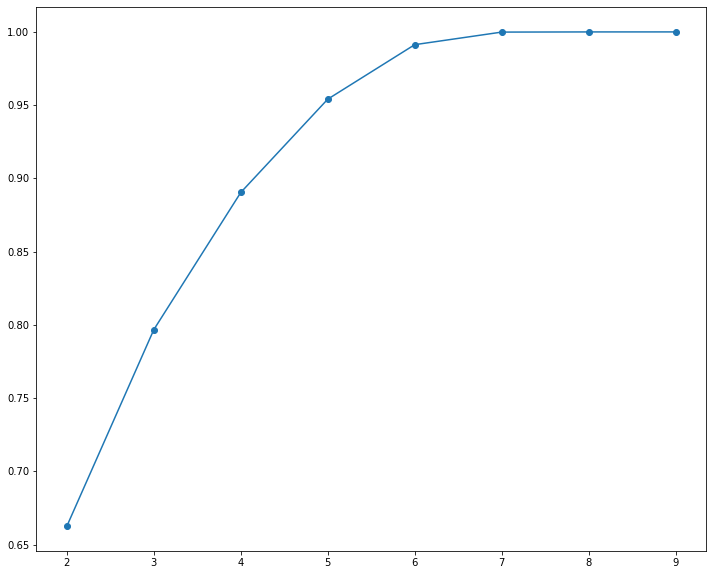

In [ ]:
pd.Series(var_ratio).plot(marker="o")

In [ ]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.2749831 , -0.02696001, -0.60864572,  1.31185923,  0.26372887,
        -0.13545607],
       [-1.83583672, -0.24750876, -0.54870059,  0.6044741 ,  0.14472404,
         0.8149789 ],
       [ 2.69686753, -0.70328556,  0.07609195,  1.1255744 , -0.08040804,
        -0.43076556],
       ...,
       [-1.65070013,  0.47602146, -0.464073  ,  0.2441651 ,  0.17907948,
         0.54140771],
       [-1.49837418, -0.04932842, -0.09791342, -0.69710814,  0.30457466,
        -0.24478948],
       [-2.37573696,  1.07049419,  1.7903777 ,  0.61193569, -1.03116415,
        -0.05595427]])

In [ ]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [ ]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0      0.274983 -0.026960 -0.608646  1.311859  0.263729 -0.135456
1     -1.835837 -0.247509 -0.548701  0.604474  0.144724  0.814979
2      2.696868 -0.703286  0.076092  1.125574 -0.080408 -0.430766
3     -0.886194  0.301386 -1.077495 -0.101350 -0.039545 -0.194430
4     -2.114625  0.260715  1.588698 -0.303194 -0.844216 -0.331173
...         ...       ...       ...       ...       ...       ...
86251  2.331015 -0.088543 -0.688213 -0.428973 -1.021865  0.128420
86252  2.932518 -1.396563 -0.906542  1.459580 -1.212993  0.873418
86253 -1.650700  0.476021 -0.464073  0.244165  0.179079  0.541408
86254 -1.498374 -0.049328 -0.097913 -0.697108  0.304575 -0.244789
86255 -2.375737  1.070494  1.790378  0.611936 -1.031164 -0.055954

[86256 rows x 6 columns]

In [ ]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [ ]:
pos_df.shape

(43156, 6)

In [ ]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [ ]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [ ]:
val_features.shape

(9584, 1, 6)

In [ ]:
test_features.shape

(25948, 1, 6)

In [ ]:
train_features.shape

(86256, 1, 6)

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.LSTM(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.LSTM(30,activation ="relu"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 150
BATCH_SIZE = 64

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 30)             4440      
_________________________________________________________________
dropout (Dropout)            (None, 1, 30)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,791
Trainable params: 11,791
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(train_features[:10])

array([[0.82766175],
       [0.8268127 ],
       [0.8277252 ],
       [0.82706857],
       [0.82738984],
       [0.8277776 ],
       [0.8268318 ],
       [0.82793766],
       [0.8271494 ],
       [0.8269004 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9736


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([0.00129846])

In [ ]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.49724486],
       [0.4988481 ],
       [0.4968786 ],
       [0.5001977 ],
       [0.49819311],
       [0.49936932],
       [0.49858943],
       [0.49811044],
       [0.50051534],
       [0.50041217]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6923


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

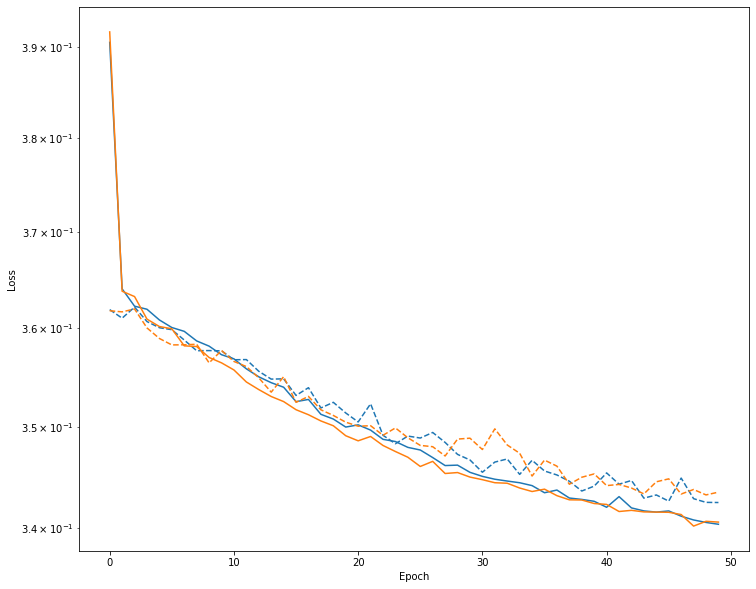

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
1348/1348 [==============================] - 11s 5ms/step - loss: 0.4513 - tp: 23559.8436 - fp: 5941.1231 - tn: 20432.7583 - fn: 2850.2039 - accuracy: 0.8326 - precision: 0.7963 - recall: 0.8942 - auc: 0.8932 - val_loss: 0.3616 - val_tp: 4212.0000 - val_fp: 1005.0000 - val_tn: 3815.0000 - val_fn: 552.0000 - val_accuracy: 0.8375 - val_precision: 0.8074 - val_recall: 0.8841 - val_auc: 0.9115
Epoch 2/150
1348/1348 [==============================] - 6s 4ms/step - loss: 0.3623 - tp: 19201.8918 - fp: 4544.8451 - tn: 17037.0289 - fn: 2416.1631 - accuracy: 0.8402 - precision: 0.8108 - recall: 0.8882 - auc: 0.9119 - val_loss: 0.3607 - val_tp: 4233.0000 - val_fp: 1020.0000 - val_tn: 3800.0000 - val_fn: 531.0000 - val_accuracy: 0.8382 - val_precision: 0.8058 - val_recall: 0.8885 - val_auc: 0.9115
Epoch 3/150
1348/1348 [==============================] - 6s 4ms/step - loss: 0.3613 - tp: 19234.0956 - fp: 4556.3247 - tn: 16981.7124 - fn: 2427.7961 - accuracy: 0.8386 - precision: 0.8089 - 

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

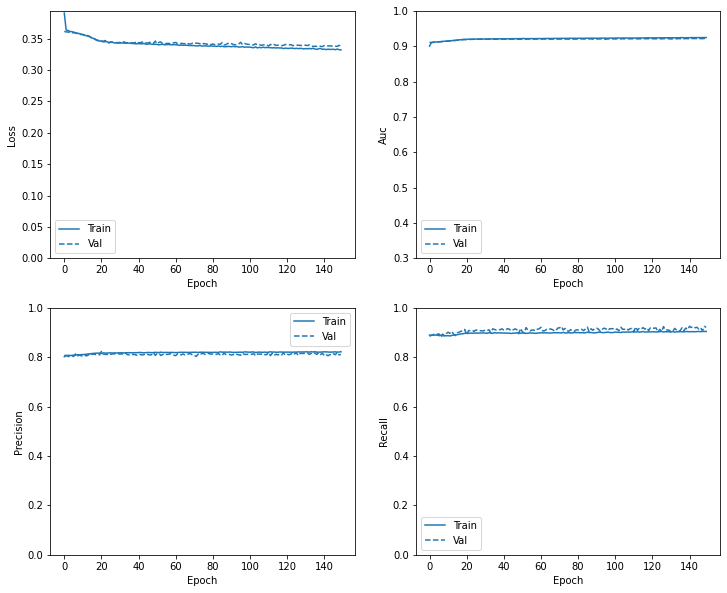

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.37841013073921204
tp :  1898.0
fp :  4792.0
tn :  19000.0
fn :  258.0
accuracy :  0.8053799867630005
precision :  0.28370702266693115
recall :  0.8803339600563049
auc :  0.915472686290741

(True Negatives):  19000
 (False Positives):  4792
(False Negatives):  258
 (True Positives):  1898
Total Transactions:  2156


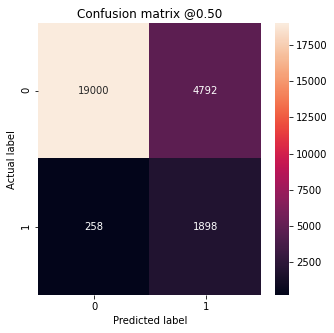

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# LSTM

In [ ]:
test_predictions_baseline

array([[8.7518007e-02],
       [2.9799074e-02],
       [1.9789091e-01],
       ...,
       [6.7089772e-01],
       [2.1925569e-04],
       [5.8732624e-12]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

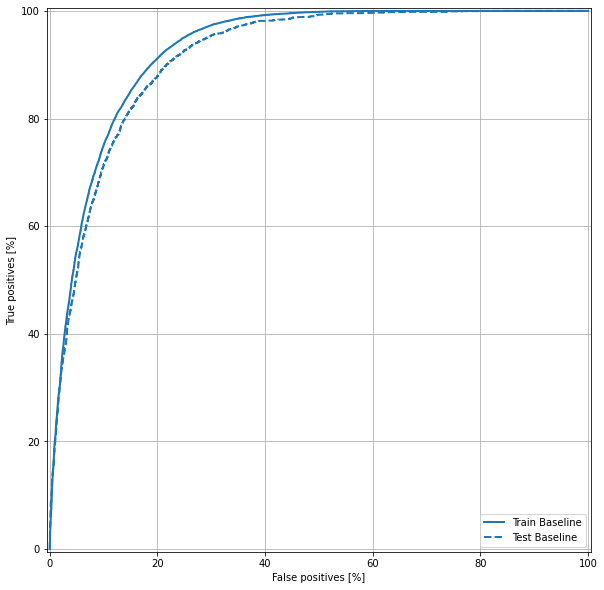

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/150
1348/1348 [==============================] - 11s 5ms/step - loss: 0.4524 - tp: 20823.4774 - fp: 9385.1119 - tn: 35981.6612 - fn: 2957.6783 - accuracy: 0.8188 - precision: 0.6484 - recall: 0.8692 - auc: 0.8868 - val_loss: 0.3633 - val_tp: 4303.0000 - val_fp: 1077.0000 - val_tn: 3743.0000 - val_fn: 461.0000 - val_accuracy: 0.8395 - val_precision: 0.7998 - val_recall: 0.9032 - val_auc: 0.9112
Epoch 2/150
1348/1348 [==============================] - 6s 4ms/step - loss: 0.3597 - tp: 19170.1312 - fp: 4567.8006 - tn: 17080.1579 - fn: 2381.8391 - accuracy: 0.8410 - precision: 0.8092 - recall: 0.8907 - auc: 0.9129 - val_loss: 0.3610 - val_tp: 4267.0000 - val_fp: 1053.0000 - val_tn: 3767.0000 - val_fn: 497.0000 - val_accuracy: 0.8383 - val_precision: 0.8021 - val_recall: 0.8957 - val_auc: 0.9120
Epoch 3/150
1348/1348 [==============================] - 5s 4ms/step - loss: 0.3643 - tp: 19131.1601 - fp: 4613.4359 - tn: 17065.3336 - fn: 2389.9993 - accuracy: 0.8381 - precision: 0.8057 - 

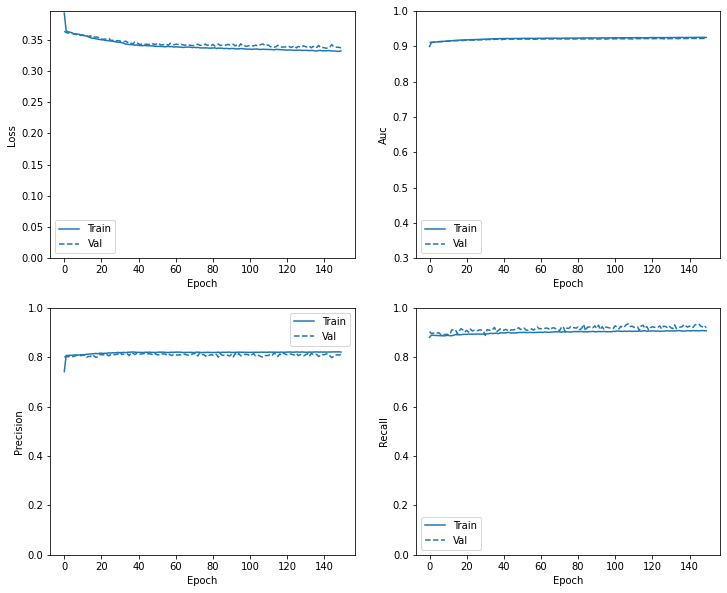

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.37810346484184265
tp :  1902.0
fp :  4757.0
tn :  19035.0
fn :  254.0
accuracy :  0.8068829774856567
precision :  0.28562846779823303
recall :  0.8821892142295837
auc :  0.9157237410545349

(True Negatives):  19035
 (False Positives):  4757
(False Negatives):  254
 (True Positives):  1902
Total Transactions:  2156


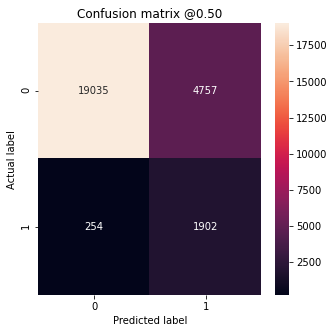

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

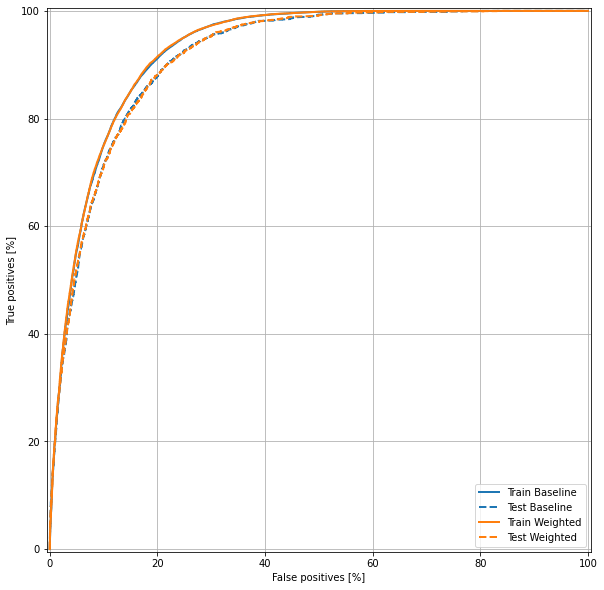

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(43100, 1, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(86200, 1, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-1.25087284  2.33998818  0.78402064 -1.04799922 -0.25398221]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.46875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1699.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/500
1699/1699 [==============================] - 7s 3ms/step - loss: 0.6997 - tp: 11427.4924 - fp: 8621.2859 - tn: 33470.3624 - fn: 18377.8218 - accuracy: 0.6291 - precision: 0.5086 - recall: 0.3360 - auc: 0.6398 - val_loss: 0.6146 - val_tp: 764.0000 - val_fp: 2298.0000 - val_tn: 3716.0000 - val_fn: 226.0000 - val_accuracy: 0.6396 - val_precision: 0.2495 - val_recall: 0.7717 - val_auc: 0.7476
Epoch 2/500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6335 - tp: 20702.2741 - fp: 10962.8412 - tn: 16333.6447 - fn: 6433.2024 - accuracy: 0.6798 - precision: 0.6538 - recall: 0.7582 - auc: 0.7077 - val_loss: 0.5963 - val_tp: 802.0000 - val_fp: 2435.0000 - val_tn: 3579.0000 - val_fn: 188.0000 - val_accuracy: 0.6255 - val_precision: 0.2478 - val_recall: 0.8101 - val_auc: 0.7481
Epoch 3/500
1699/1699 [==============================] - 4s 2ms/step - loss: 0.6190 - tp: 21433.7624 - fp: 11241.9694 - tn: 15932.3294 - fn: 5823.9012 - accuracy: 0.6859 - precision: 0.6557 - 

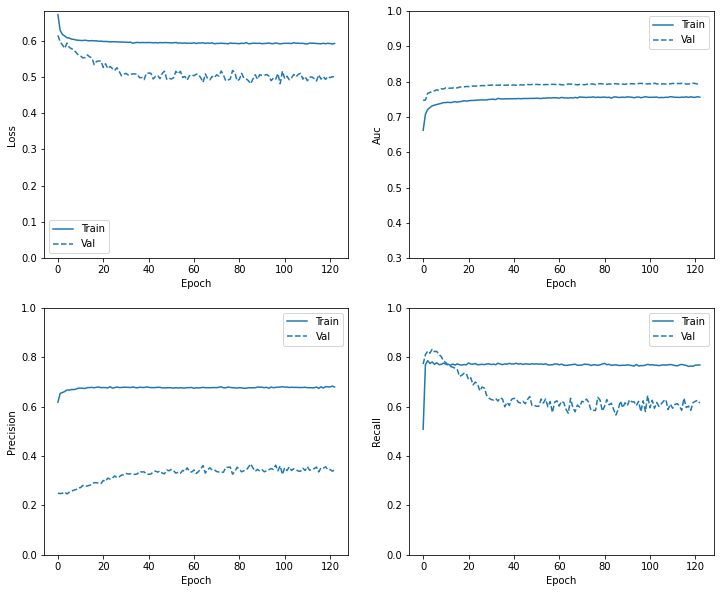

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6446671485900879
tp :  1814.0
fp :  5482.0
tn :  9573.0
fn :  596.0
accuracy :  0.6519896984100342
precision :  0.2486293911933899
recall :  0.7526971101760864
auc :  0.7677501440048218

(True Negatives):  9573
 (False Positives):  5482
(False Negatives):  596
 (True Positives):  1814
Total Transactions:  2410


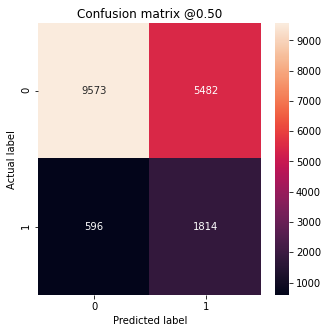

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

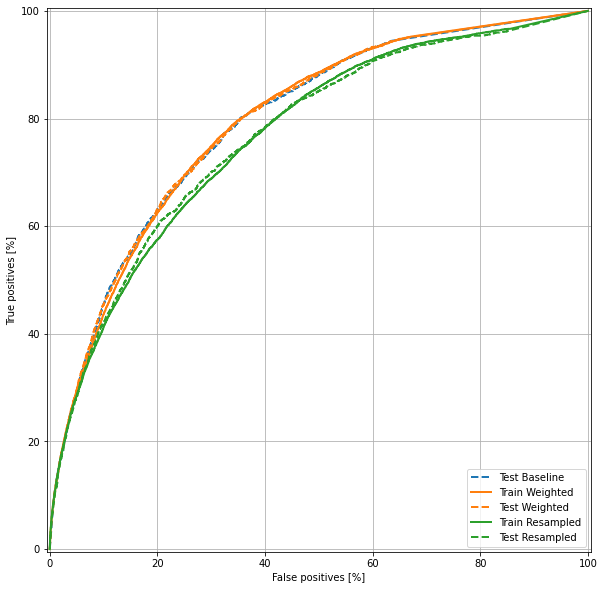

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# GRU

In [ ]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               69.0  ...         0.0        0.0
4   4.0               72.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               79.0  ...         0.0        0.0
4   4.0               85.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [ ]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

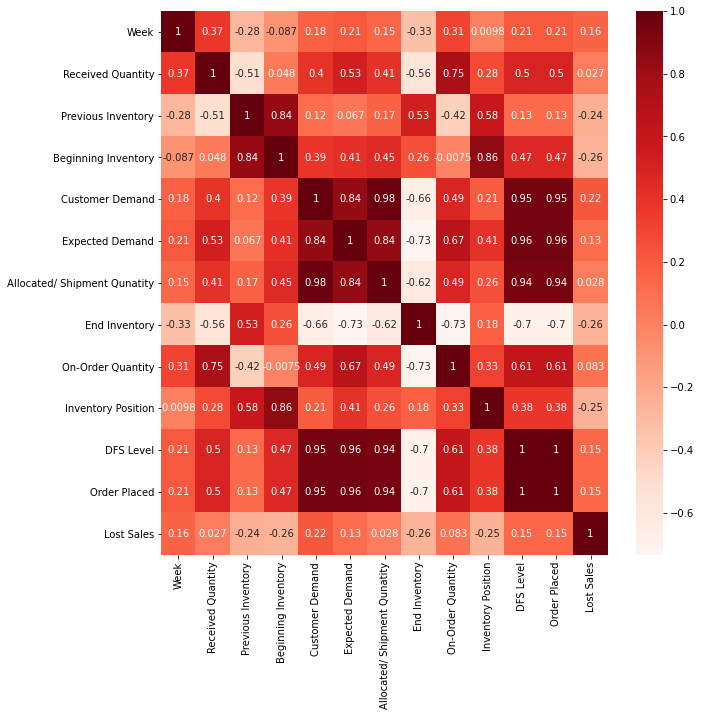

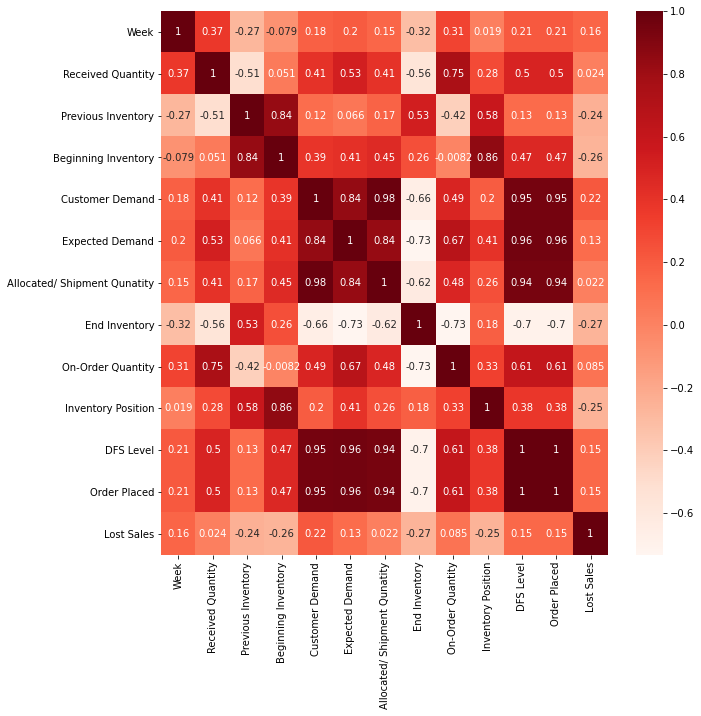

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [ ]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [ ]:
X_train.head()

Week  Received Quantity  ...  DFS Level  Lost Sales
0   0.0                0.0  ...        0.0         0.0
1   1.0                0.0  ...       69.0         0.0
2   2.0                0.0  ...       72.0         0.0
3   3.0               69.0  ...       66.0         0.0
4   4.0               72.0  ...       81.0         0.0

[5 rows x 10 columns]

In [ ]:
X_train.shape

(104052, 10)

In [ ]:
X_test.shape

(25948, 10)

- Correlation


In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8211 (7.89% of total)



In [ ]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, po, 100 * po / tot))

Examples:
    Total: 25948
    Positive: 2156 (8.31% of total)



In [ ]:
!pip install imbalanced-learn

In [ ]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [ ]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95841, 1: 8211})


Counter({0: 23792, 1: 2156})

OVER and Under Sampling pipeline

OVER SAMPLING

In [ ]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.60)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95841, 1: 57504})


UNDER SAMPLING

In [ ]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 57504, 1: 57504})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
114998  1
114999  1
115000  1
115001  1
115002  1
115003  1
115004  1
115005  1
115006  1
115007  1

In [ ]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...           7          8          9
114978  44.151254  75.000000   0.000000  ...   81.151254  78.848746   2.848746
114979  46.686246  77.000000   9.313754  ...   80.156877  82.156877   0.000000
114980   7.632286  82.080714  36.183857  ...  122.896857  75.551572   0.000000
114981  35.425137  84.000000   0.000000  ...   92.000000  73.856284   0.000000
114982  36.000000  81.088686  12.366970  ...   86.000000  78.088686   0.000000
114983  32.283924  82.283924   0.000000  ...   84.000000  82.716076   1.432153
114984  20.209923  78.209923  16.860052  ...   79.000000  84.069974   0.000000
114985  43.626004  75.252008   0.747992  ...   83.626004  76.000000   0.000000
114986  15.728558  83.457117  15.271442  ...   98.457117  79.457117   0.000000
114987  32.146113  76.146113   0.000000  ...   80.853887  78.146113   1.853887
114988  12.616458  80.000000  12.654114  ...   87.616458  82.654114   0.000000
114989  34.000000  77.790682   0.000000  ...   82.581363  77.209318   0.000000
114990  44.255316  75.563829   7.127658  ...   86.436171  81.563829   1.000000
114991  27.063063  74.531531   0.000000  ...   89.405406  71.531531   0.000000
114992  47.636128  78.727744   0.000000  ...   81.636128  87.363872  15.272256
114993  38.000000  75.000000   0.000000  ...   81.000000  80.889761   6.220478
114994  45.922492  75.000000   8.461246  ...   81.538754  84.461246   5.538754
114995  35.388860  76.000000   7.000000  ...   79.611140  85.000000   7.000000
114996  46.000000  72.074384   0.925616  ...   88.776847  70.148769   0.000000
114997  29.942781  84.019073   0.000000  ...   85.019073  76.019073   0.000000
114998  32.000000  77.854418   0.000000  ...   79.000000  79.572791   3.145582
114999  28.676665  87.970004   5.000000  ...   88.970004  85.323335   0.000000
115000  44.122389  77.877611   0.000000  ...   80.122389  81.000000   7.000000
115001  29.081937  71.163873   0.000000  ...   75.918063  76.081937   4.000000
115002  40.340503  81.681006   2.637988  ...   86.659497  81.000000   0.340503
115003  45.183956  70.789304   6.816044  ...   71.789304  77.000000   0.000000
115004  48.000000  75.366477   0.000000  ...   88.000000  75.366477   0.000000
115005  18.319986  72.560005  38.199976  ...   89.519962  82.439995   0.000000
115006  46.932567  74.067433   9.067433  ...   88.202300  78.932567   0.000000
115007  40.568775  76.522925   0.477075  ...   97.045850  69.000000   0.000000

[30 rows x 10 columns]

In [ ]:
X_train.shape

(115008, 10)

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 115008
    Positive: 57504 (50.00% of total)



In [ ]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_df.shape

(103507, 10)

In [ ]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 103507
    Positive: 51673 (49.92% of total)



In [ ]:
a=pd.DataFrame(bool_train_labels)
a.shape

(103507, 1)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (103507,)
Validation labels shape: (11501,)
Test labels shape: (25948,)
Training features shape: (103507, 10)
Validation features shape: (11501, 10)
Test features shape: (25948, 10)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.6670535648137284,
 3: 0.8056446019839885,
 4: 0.8938425743464115,
 5: 0.9560358096348116,
 6: 0.9904029584732036,
 7: 0.9984115094301537,
 8: 0.9999067649782309,
 9: 0.9999920493934091}

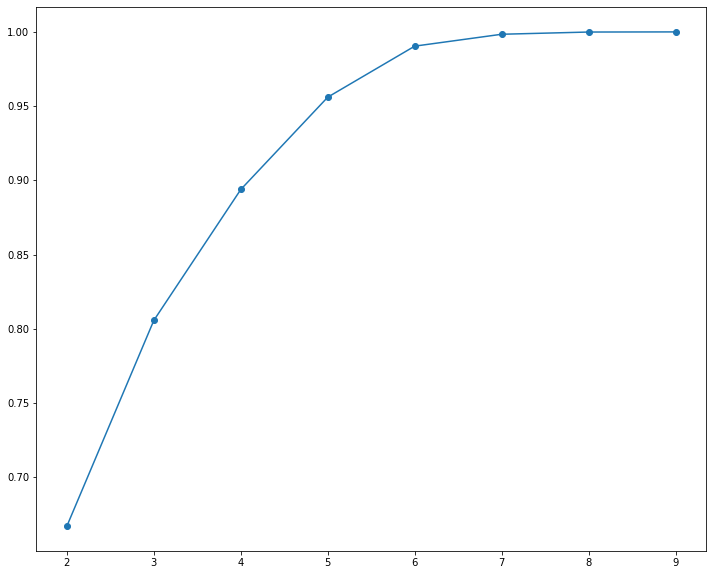

In [ ]:
pd.Series(var_ratio).plot(marker="o")

In [ ]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 8.70980249e-01, -7.40521212e-01, -3.58331371e-01,
        -1.15239146e+00, -3.99272570e-01, -5.34619341e-01],
       [ 2.91518109e-01, -1.15494119e+00,  6.94122850e-01,
        -1.98291798e+00,  2.51532422e-01, -3.71641423e-01],
       [-7.74341931e-01, -1.39143331e-01, -5.34559991e-01,
        -9.55976475e-01,  2.53149376e-03,  6.41805746e-01],
       ...,
       [-1.08880573e+00, -5.72188033e-01, -3.62771575e-01,
        -7.50044531e-01,  3.83607663e-01, -2.06029549e-01],
       [ 4.37321380e+00, -1.54247501e+00, -9.94500638e-01,
         2.24365569e+00, -1.07688517e+00,  5.28627969e-01],
       [-1.56839860e+00, -3.42788827e-01,  8.52149316e-01,
        -7.70474427e-02,  5.28008118e-01, -1.72669665e-01]])

In [ ]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [ ]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0       0.870980 -0.740521 -0.358331 -1.152391 -0.399273 -0.534619
1       0.291518 -1.154941  0.694123 -1.982918  0.251532 -0.371641
2      -0.774342 -0.139143 -0.534560 -0.955976  0.002531  0.641806
3       5.025074 -2.541972  0.037765  1.349776 -0.838687 -0.022065
4       4.684288 -2.396598 -0.264465  2.834595 -0.398079 -0.213286
...          ...       ...       ...       ...       ...       ...
103502 -1.986097 -0.570386  1.347079  0.481796  0.022210  0.030737
103503 -1.453469  0.705574  0.659835  0.361753  0.728126 -0.062995
103504 -1.088806 -0.572188 -0.362772 -0.750045  0.383608 -0.206030
103505  4.373214 -1.542475 -0.994501  2.243656 -1.076885  0.528628
103506 -1.568399 -0.342789  0.852149 -0.077047  0.528008 -0.172670

[103507 rows x 6 columns]

In [ ]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [ ]:
pos_df.shape

(51673, 6)

In [ ]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))




In [ ]:
val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [ ]:
val_features.shape

(11501, 1, 6)

In [ ]:
test_features.shape

(25948, 1, 6)

In [ ]:
train_features.shape

(103507, 1, 6)

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Embedding
from keras.layers import Dropout

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)

  model = keras.Sequential([
      keras.layers.GRU(
        30, activation='relu',
          input_shape=(train_features.shape[1], train_features.shape[2]),return_sequences=True),
      keras.layers.Dropout(0.2),
        keras.layers.GRU(20,activation ="tanh"),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(8,activation="relu"),
      # keras.layers.Dropout(0.2),
      # keras.layers.Dense(6,activation="relu"),
      # keras.layers.Dense(4,activation="relu"),
      # keras.layers.Dense(2,activation="sigmoid"),
      # keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 150
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 30)             3420      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 30)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(train_features[:10])

array([[0.42851764],
       [0.4220655 ],
       [0.41630852],
       [0.38110015],
       [0.38109323],
       [0.41723228],
       [0.40891016],
       [0.41958562],
       [0.42097372],
       [0.41646522]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7014


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.0031109])

In [ ]:

model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.48233676],
       [0.48774397],
       [0.5089743 ],
       [0.4845232 ],
       [0.49611023],
       [0.51579094],
       [0.49491253],
       [0.5071361 ],
       [0.48599258],
       [0.5136668 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6842


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

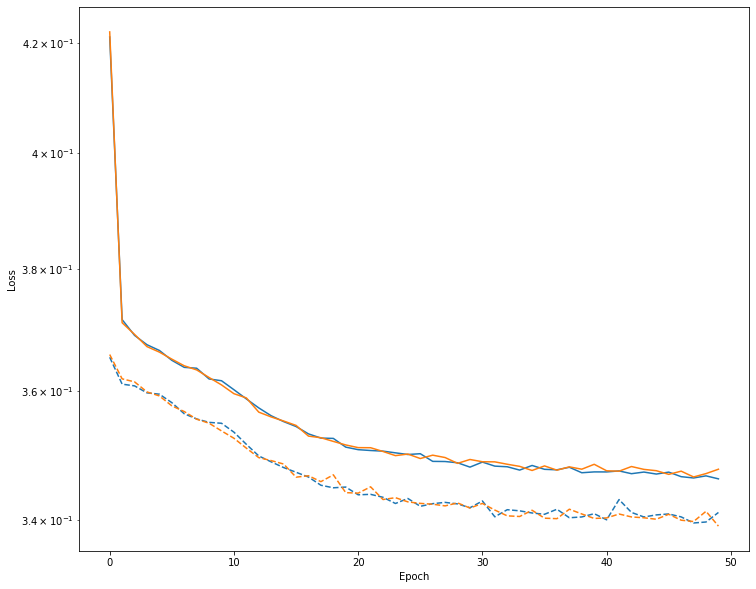

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/150
405/405 [==============================] - 9s 9ms/step - loss: 0.4956 - tp: 27519.4680 - fp: 7109.8473 - tn: 24681.1675 - fn: 4285.0345 - accuracy: 0.8193 - precision: 0.7933 - recall: 0.8638 - auc: 0.8814 - val_loss: 0.3649 - val_tp: 5136.0000 - val_fp: 1185.0000 - val_tn: 4485.0000 - val_fn: 695.0000 - val_accuracy: 0.8365 - val_precision: 0.8125 - val_recall: 0.8808 - val_auc: 0.9123
Epoch 2/150
405/405 [==============================] - 2s 6ms/step - loss: 0.3721 - tp: 23079.5887 - fp: 5614.4655 - tn: 20452.8892 - fn: 2947.5739 - accuracy: 0.8364 - precision: 0.8056 - recall: 0.8862 - auc: 0.9073 - val_loss: 0.3612 - val_tp: 5172.0000 - val_fp: 1220.0000 - val_tn: 4450.0000 - val_fn: 659.0000 - val_accuracy: 0.8366 - val_precision: 0.8091 - val_recall: 0.8870 - val_auc: 0.9137
Epoch 3/150
405/405 [==============================] - 2s 6ms/step - loss: 0.3684 - tp: 23206.5739 - fp: 5699.7808 - tn: 20411.2315 - fn: 2776.9310 - accuracy: 0.8377 - precision: 0.8035 - recall:

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

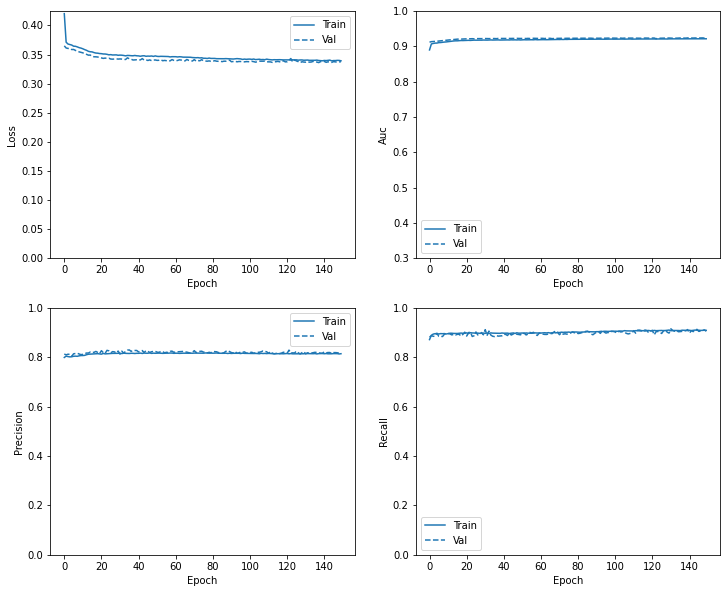

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.3495921790599823
tp :  1901.0
fp :  4731.0
tn :  19061.0
fn :  255.0
accuracy :  0.8078464865684509
precision :  0.2866405248641968
recall :  0.8817254304885864
auc :  0.9174862504005432

(True Negatives):  19061
 (False Positives):  4731
(False Negatives):  255
 (True Positives):  1901
Total Transactions:  2156


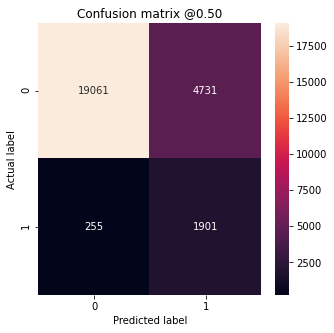

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# GRU

In [ ]:
test_predictions_baseline

array([[5.82335889e-02],
       [4.40902710e-02],
       [1.61261469e-01],
       ...,
       [4.23731446e-01],
       [4.52414155e-03],
       [1.24913295e-05]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

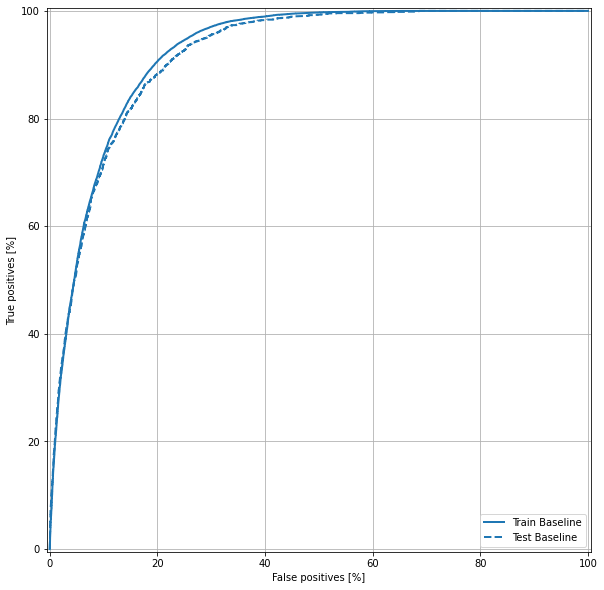

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/170
510/510 [==============================] - 5s 5ms/step - loss: 0.6061 - tp: 13864.7593 - fp: 5879.9922 - tn: 14075.8728 - fn: 6192.8356 - accuracy: 0.6963 - precision: 0.7023 - recall: 0.6850 - auc: 0.7659 - val_loss: 0.5366 - val_tp: 2778.0000 - val_fp: 1036.0000 - val_tn: 2562.0000 - val_fn: 870.0000 - val_accuracy: 0.7370 - val_precision: 0.7284 - val_recall: 0.7615 - val_auc: 0.8058
Epoch 2/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5487 - tp: 12068.2975 - fp: 4777.7730 - tn: 11596.0705 - fn: 4325.3190 - accuracy: 0.7198 - precision: 0.7145 - recall: 0.7350 - auc: 0.7933 - val_loss: 0.5307 - val_tp: 2666.0000 - val_fp: 926.0000 - val_tn: 2672.0000 - val_fn: 982.0000 - val_accuracy: 0.7367 - val_precision: 0.7422 - val_recall: 0.7308 - val_auc: 0.8100
Epoch 3/170
510/510 [==============================] - 2s 3ms/step - loss: 0.5426 - tp: 12040.8924 - fp: 4730.6947 - tn: 11720.9237 - fn: 4274.9491 - accuracy: 0.7250 - precision: 0.7165 - recall: 

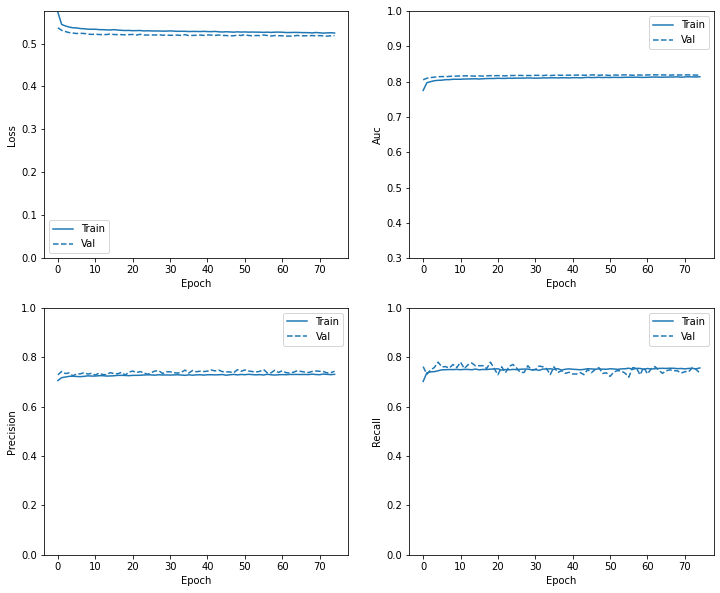

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5184459090232849
tp :  2681.0
fp :  930.0
tn :  2668.0
fn :  967.0
accuracy :  0.7382003664970398
precision :  0.7424536347389221
recall :  0.734923243522644
auc :  0.8197070360183716

(True Negatives):  2668
 (False Positives):  930
(False Negatives):  967
 (True Positives):  2681
Total Transactions:  3648


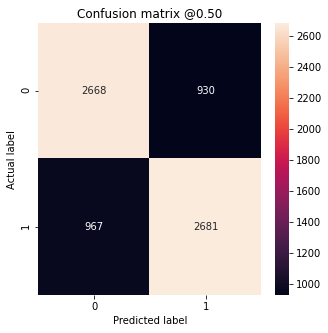

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

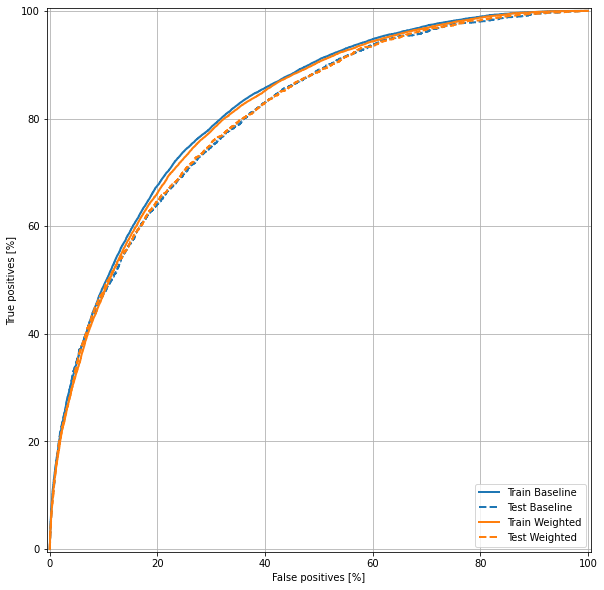

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(32628, 1, 5)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(65256, 1, 5)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[ 1.71830398 -1.13673723 -2.17685057  0.62384352  0.08632702]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 1, 5), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

510.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/170
510/510 [==============================] - 6s 5ms/step - loss: 0.6074 - tp: 14156.6497 - fp: 6440.0117 - tn: 13526.1859 - fn: 5890.9022 - accuracy: 0.6877 - precision: 0.6831 - recall: 0.7048 - auc: 0.7628 - val_loss: 0.5354 - val_tp: 2790.0000 - val_fp: 1051.0000 - val_tn: 2547.0000 - val_fn: 858.0000 - val_accuracy: 0.7365 - val_precision: 0.7264 - val_recall: 0.7648 - val_auc: 0.8054
Epoch 2/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5484 - tp: 11934.6830 - fp: 4756.3014 - tn: 11650.7417 - fn: 4426.0235 - accuracy: 0.7175 - precision: 0.7127 - recall: 0.7268 - auc: 0.7932 - val_loss: 0.5289 - val_tp: 2829.0000 - val_fp: 1054.0000 - val_tn: 2544.0000 - val_fn: 819.0000 - val_accuracy: 0.7415 - val_precision: 0.7286 - val_recall: 0.7755 - val_auc: 0.8106
Epoch 3/170
510/510 [==============================] - 2s 4ms/step - loss: 0.5406 - tp: 12027.2779 - fp: 4643.0528 - tn: 11808.1996 - fn: 4289.2192 - accuracy: 0.7271 - precision: 0.7202 - recall:

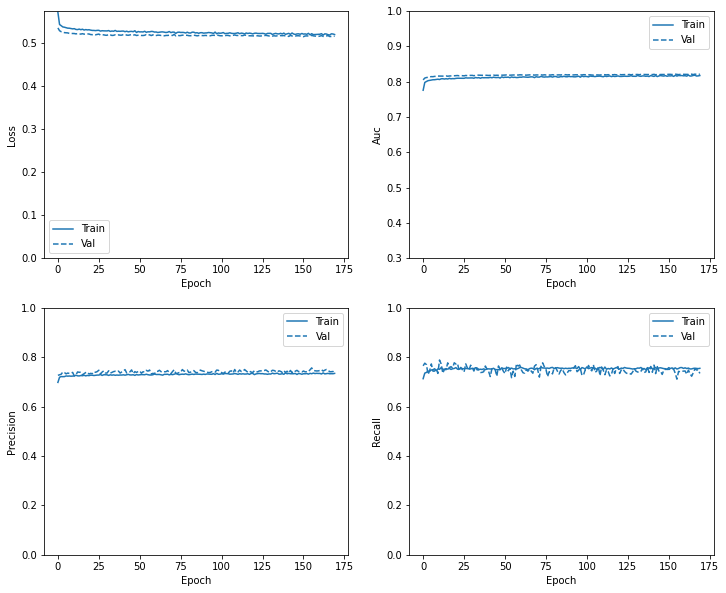

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/340
20/20 [==============================] - 5s 59ms/step - loss: 0.7008 - tp: 2889.5714 - fp: 1123.3810 - tn: 3173.1429 - fn: 1461.8095 - accuracy: 0.7026 - precision: 0.7211 - recall: 0.6663 - auc: 0.7899 - val_loss: 0.6765 - val_tp: 2654.0000 - val_fp: 1538.0000 - val_tn: 2060.0000 - val_fn: 994.0000 - val_accuracy: 0.6506 - val_precision: 0.6331 - val_recall: 0.7275 - val_auc: 0.7144
Epoch 2/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6712 - tp: 530.3810 - fp: 300.8095 - tn: 375.7619 - fn: 194.9524 - accuracy: 0.6415 - precision: 0.6332 - recall: 0.7234 - auc: 0.6948 - val_loss: 0.6484 - val_tp: 2741.0000 - val_fp: 1530.0000 - val_tn: 2068.0000 - val_fn: 907.0000 - val_accuracy: 0.6637 - val_precision: 0.6418 - val_recall: 0.7514 - val_auc: 0.7430
Epoch 3/340
20/20 [==============================] - 0s 8ms/step - loss: 0.6436 - tp: 509.1905 - fp: 278.0476 - tn: 428.1429 - fn: 186.5238 - accuracy: 0.6618 - precision: 0.6349 - recall: 0.7350 - auc: 0.73

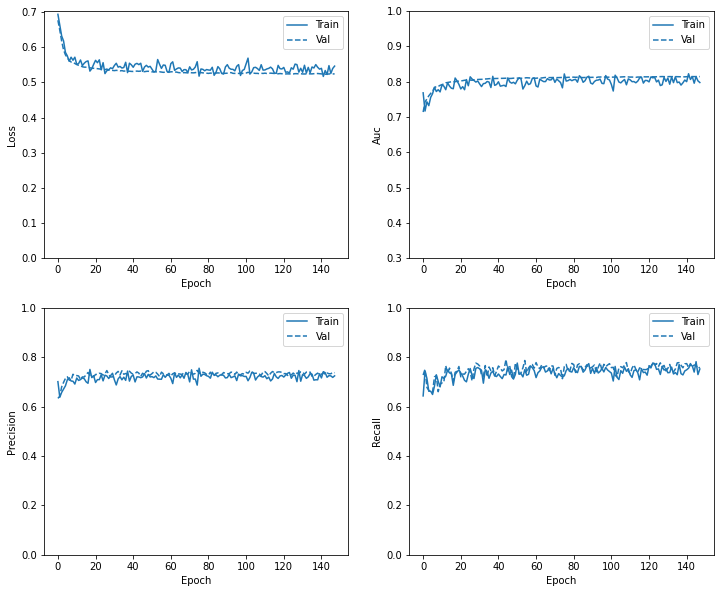

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)


loss :  0.524739682674408
tp :  2775.0
fp :  998.0
tn :  2600.0
fn :  873.0
accuracy :  0.7417885661125183
precision :  0.735489010810852
recall :  0.7606908082962036
auc :  0.8148261308670044

(True Negatives):  2600
 (False Positives):  998
(False Negatives):  873
 (True Positives):  2775
Total Transactions:  3648


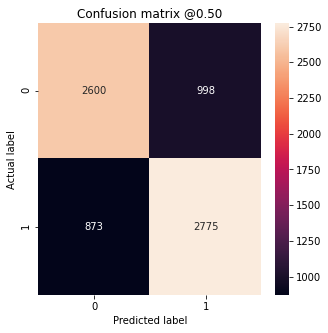

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

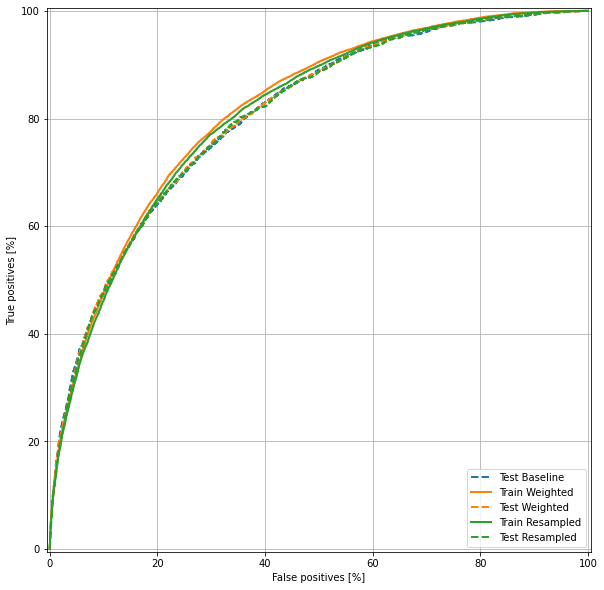

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# 1D CONV

In [ ]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               69.0  ...         0.0        0.0
4   4.0               72.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               79.0  ...         0.0        0.0
4   4.0               85.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [ ]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [ ]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )

In [ ]:
X_train.head()

Week  Received Quantity  ...  DFS Level  Lost Sales
0   0.0                0.0  ...        0.0         0.0
1   1.0                0.0  ...       69.0         0.0
2   2.0                0.0  ...       72.0         0.0
3   3.0               69.0  ...       66.0         0.0
4   4.0               72.0  ...       81.0         0.0

[5 rows x 10 columns]

In [ ]:
X_train.shape

(104052, 10)

In [ ]:
X_test.shape

(25948, 10)

- Correlation


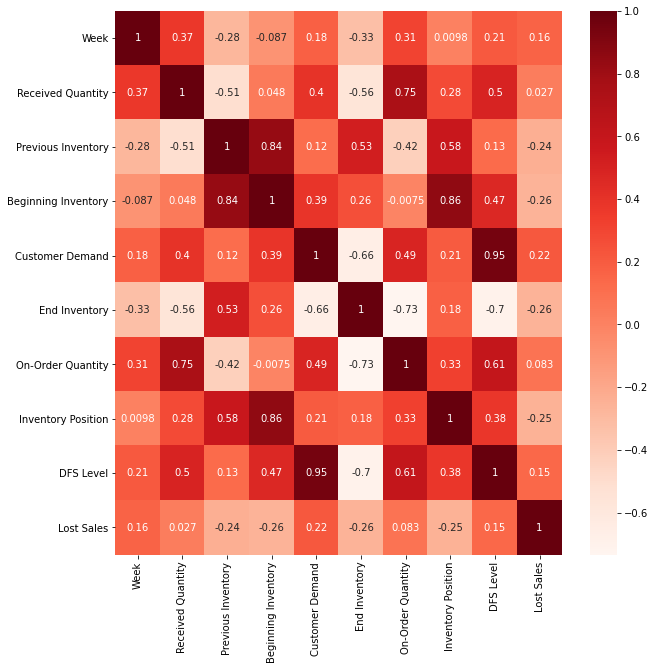

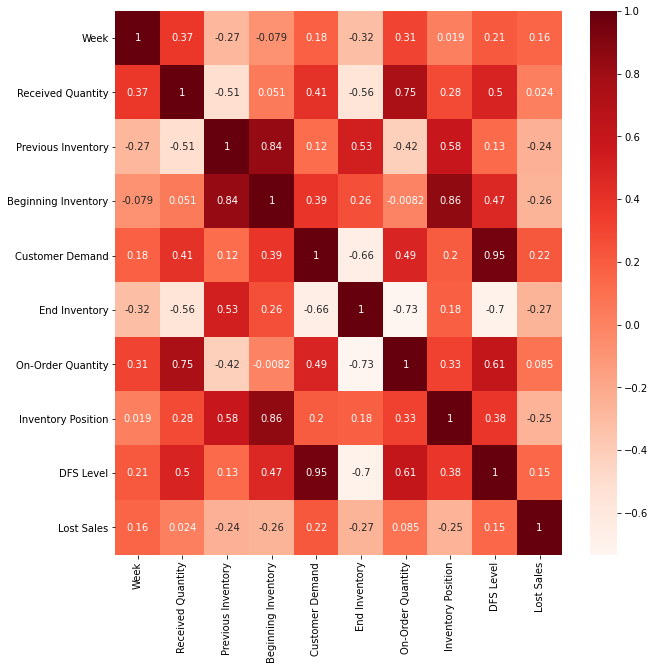

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8211 (7.89% of total)



In [ ]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 25948
    Positive: 8211 (7.89% of total)



In [ ]:
!pip install imbalanced-learn

In [ ]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [ ]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95841, 1: 8211})


Counter({0: 23792, 1: 2156})

OVER and Under Sampling pipeline

OVER SAMPLING

In [ ]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.40)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95841, 1: 38336})


UNDER SAMPLING

In [ ]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38336, 1: 38336})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
90556  1
90557  1
90558  1
90559  1
90560  1
90561  1
90562  1
90563  1
90564  1
90565  1

In [ ]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...           7          8          9
76642  45.000000  73.192734   9.000000  ...   72.000000  82.000000   4.710899
76643  48.889112  78.972278   0.000000  ...   83.972278  92.944556  25.027722
76644  42.927015  78.000000  18.072985  ...   84.927015  81.072985   0.000000
76645  13.318467  83.681533  11.106156  ...   92.787689  80.893844   0.000000
76646   8.000000  90.908692   0.000000  ...   86.045654  82.931519   0.000000
76647   4.010440  84.001305  19.998695  ...  107.993475  82.001305   0.000000
76648  19.177270  79.822730   0.000000  ...   80.588635  81.588635   4.588635
76649  47.000000  73.690668   0.000000  ...   82.000000  81.381336  11.000000
76650  21.279908  84.000000   0.000000  ...   97.240031  76.000000   0.000000
76651  29.202848  73.405695   0.000000  ...   87.202848  82.594305  11.594305
76652  47.698500  76.603000   3.301500  ...   77.301500  84.698500   9.698500
76653  14.005964  81.997018  15.005964  ...   87.504473  79.501491   0.000000
76654  38.255405  72.255405   0.000000  ...   80.255405  76.744595   2.744595
76655  19.601714  68.593143  21.203429  ...   92.593143  74.796571   0.000000
76656  41.000000  73.850569   8.000000  ...   74.049810  82.950190   5.099621
76657  28.168717  78.168717   0.000000  ...   84.168717  83.000000   7.831283
76658  47.000000  75.397090   0.000000  ...   92.000000  74.000000   0.000000
76659  37.051650  83.896700  19.051650  ...  110.741749  78.051650   0.000000
76660  49.000000  77.000000   0.000000  ...   84.488619  83.511381   9.755690
76661  43.969051  75.484525   1.030949  ...   88.484525  72.969051   0.000000
76662  10.010981  79.967057  32.978038  ...   98.989019  86.978038   0.000000
76663  27.869992  80.260017   0.000000  ...   87.000000  87.000000  11.130008
76664  29.940621  79.000000  25.343230  ...   98.000000  78.000000   0.000000
76665  39.528435  76.528435   0.000000  ...   84.528435  80.471565   5.471565
76666  35.068654  70.000000   0.000000  ...   80.000000  77.000000   5.137308
76667  44.907001  73.360502   3.639498  ...   81.092999  76.000000   0.000000
76668  28.551073  78.448927   3.448927  ...   86.000000  81.000000   0.000000
76669  22.882868  75.351396   1.765736  ...   78.234264  78.117132   1.000000
76670  41.402175  68.000000   0.597825  ...   86.505437  80.000000  15.402175
76671  37.516746  73.449761   0.000000  ...   85.000000  87.483254  24.516746

[30 rows x 10 columns]

In [ ]:
X_train.shape

(76672, 10)

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76672
    Positive: 38336 (50.00% of total)



In [ ]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.25)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_df.shape

(57504, 10)

In [ ]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 57504
    Positive: 28694 (49.90% of total)



In [ ]:
a=pd.DataFrame(bool_train_labels)
a.shape

(57504, 1)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (57504,)
Validation labels shape: (19168,)
Test labels shape: (25948,)
Training features shape: (57504, 10)
Validation features shape: (19168, 10)
Test features shape: (25948, 10)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(2,10):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.6679043515047338,
 3: 0.8047844832210316,
 4: 0.8942487477506673,
 5: 0.9564789100256329,
 6: 0.9903608218717322,
 7: 0.9984152914957825,
 8: 0.9998906402139847,
 9: 0.9999882748029627}

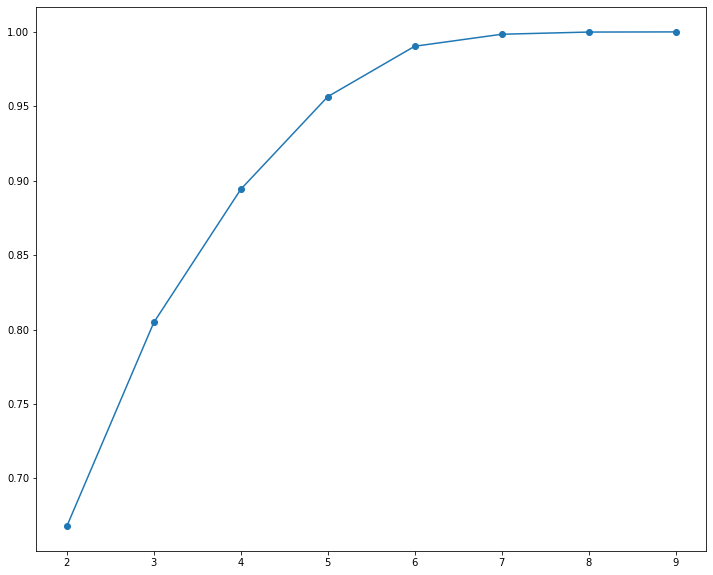

In [ ]:
pd.Series(var_ratio).plot(marker="o")

In [ ]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[-0.59810517,  0.64459256, -0.92353495,  0.55915817,  0.39774606,
        -0.63077197],
       [-1.25016369, -0.38245245, -0.45102442, -1.24698662,  0.22071315,
        -0.16552167],
       [ 2.26375232, -1.00686297, -0.54378847, -1.10408276, -1.08786524,
        -0.18722356],
       ...,
       [ 1.02344192,  0.34401716, -0.1965777 , -0.80960387, -0.16633365,
        -0.50702716],
       [-1.04171386,  0.05586735, -0.27147591,  0.34647066,  0.82997305,
         0.22598021],
       [-1.59659141, -0.17463416,  0.30048561, -0.1396704 ,  0.80448829,
        -0.51192452]])

In [ ]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [ ]:
val_features

array([[-1.13226412e+00,  7.47235905e-01, -7.14596974e-01,
         5.50087847e-01,  6.56385436e-01,  3.39372859e-02],
       [ 1.09250552e-02,  6.75151962e-01, -3.39585937e-01,
        -1.23495661e+00, -1.17973983e-01,  2.23895877e-03],
       [-6.93028510e-01,  8.38555599e-02, -2.50613019e-01,
        -1.20560390e+00,  2.22879489e-01, -2.95776453e-01],
       ...,
       [ 8.69846213e-01, -1.45161313e+00, -1.32593221e-01,
         1.71489739e-01,  1.75026063e-01, -2.11912430e-01],
       [ 3.17746695e+00, -1.06898352e+00,  6.43997941e-01,
        -5.25696288e-01, -3.27174084e-01, -7.02271949e-02],
       [ 3.36933342e+00,  8.14277850e-01,  2.27680385e+00,
        -8.75222087e-01,  1.49132135e-01,  4.62357830e+00]])

In [ ]:
test_features

array([[ 3.44921853, 12.11975203,  0.72676242,  0.22894575, -0.43670759,
        -1.09324868],
       [ 8.41918325,  1.54496915,  4.999065  ,  0.98379572,  1.71070144,
        -0.20510746],
       [ 3.43304759,  0.44445156,  3.71628286, -0.95060573,  1.32411542,
         3.55175552],
       ...,
       [-1.18789407, -1.00576558,  0.35636819,  0.70338299,  1.48559154,
        -0.14656592],
       [-1.12210316,  0.0783252 , -1.25271786,  0.97627652,  0.30873356,
         0.51404543],
       [-0.41511031,  0.01277152, -1.33959437,  1.32815375,  0.25030143,
        -0.49807876]])

In [ ]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2         3         4         5
0     -0.598105  0.644593 -0.923535  0.559158  0.397746 -0.630772
1     -1.250164 -0.382452 -0.451024 -1.246987  0.220713 -0.165522
2      2.263752 -1.006863 -0.543788 -1.104083 -1.087865 -0.187224
3      5.399308 -2.850325 -0.529237  2.731195 -0.910811 -0.028443
4      4.074987  0.642746  4.174030 -0.702759  1.643951  2.828119
...         ...       ...       ...       ...       ...       ...
57499  1.257922 -1.507344 -0.260639  0.831070  0.204666 -0.444239
57500  0.772858 -0.260500 -0.698234 -0.022253 -0.256540 -0.053857
57501  1.023442  0.344017 -0.196578 -0.809604 -0.166334 -0.507027
57502 -1.041714  0.055867 -0.271476  0.346471  0.829973  0.225980
57503 -1.596591 -0.174634  0.300486 -0.139670  0.804488 -0.511925

[57504 rows x 6 columns]

In [ ]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [ ]:
pos_df.shape

(28694, 6)

In [ ]:
test_features.shape

(25948, 6)

In [ ]:
train_features = np.array(train_features).reshape((train_features.shape[0], 1, train_features.shape[1]))
test_features = np.array(test_features).reshape((test_features.shape[0], 1, test_features.shape[1]))

val_features = np.array(val_features).reshape((val_features.shape[0], 1, val_features.shape[1]))

In [ ]:
train_features = train_features.reshape(train_features.shape[0],train_features.shape[2],1)
test_features = test_features.reshape(test_features.shape[0],test_features.shape[2],1)
val_features = val_features.reshape(val_features.shape[0],val_features.shape[2],1)

In [ ]:
import keras 
from keras.models import Model 
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
input_shape=(train_features.shape[1], 1)
model.add(Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = "same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 64)             192       
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)              

In [ ]:
input_shape=(train_features.shape[1], 1)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      Conv1D(64, kernel_size=2,padding = "same",activation="relu", input_shape=input_shape),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Conv1D(64,kernel_size=3,padding = "same", activation="relu"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPooling1D(pool_size=(2)),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="tanh"),
      Dropout(0.2),
      Dense(32, activation="tanh"),
      Dropout(0.2),
      Dense(16, activation="relu"),
      Dropout(0.2),

#       model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(64, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="tanh"))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation="relu"))

# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))
# model.summary()
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(8,activation="relu"),
#       keras.layers.Dropout(0.2),
#       keras.layers.Dense(6,activation="relu"),
#       keras.layers.Dense(4,activation="relu"),
#       keras.layers.Dense(2,activation="sigmoid"),
#       keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6, 64)             192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 6, 64)             256       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 64)             12352     
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 64)             256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)              

In [ ]:
model.predict(train_features[:10])

array([[0.6069917 ],
       [0.58410597],
       [0.5635476 ],
       [0.64382386],
       [0.70754737],
       [0.62111783],
       [0.5860832 ],
       [0.6216541 ],
       [0.60617435],
       [0.59465224]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.7103


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.00403451])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.4679493 ],
       [0.49370253],
       [0.48969477],
       [0.43246987],
       [0.4243977 ],
       [0.49316007],
       [0.479952  ],
       [0.4828155 ],
       [0.4760479 ],
       [0.49793065]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6861


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

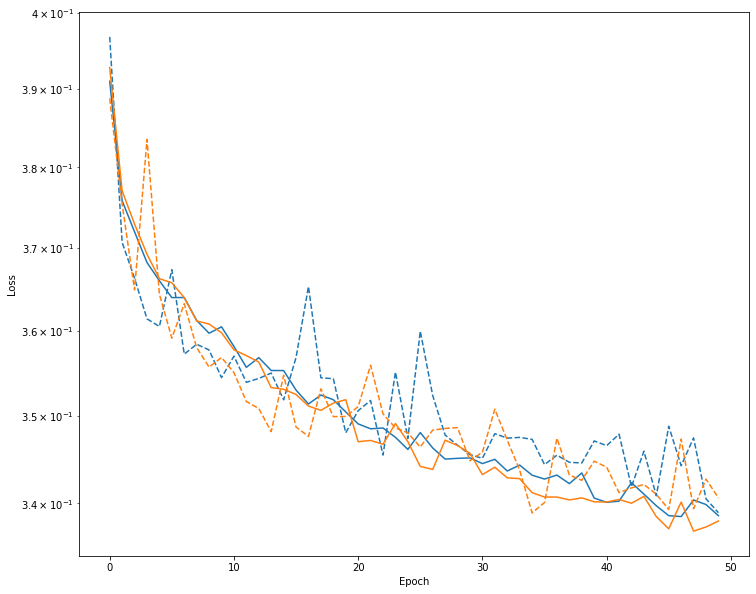

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/200
225/225 [==============================] - 7s 18ms/step - loss: 0.4199 - tp: 21536.5575 - fp: 5466.0088 - tn: 18628.9469 - fn: 2590.5044 - accuracy: 0.8333 - precision: 0.7985 - recall: 0.8921 - auc: 0.9045 - val_loss: 0.3746 - val_tp: 8696.0000 - val_fp: 2259.0000 - val_tn: 7267.0000 - val_fn: 946.0000 - val_accuracy: 0.8328 - val_precision: 0.7938 - val_recall: 0.9019 - val_auc: 0.9072
Epoch 2/200
225/225 [==============================] - 3s 14ms/step - loss: 0.3764 - tp: 13021.1150 - fp: 3294.2212 - tn: 11300.5973 - fn: 1438.0841 - accuracy: 0.8378 - precision: 0.7999 - recall: 0.8997 - auc: 0.9057 - val_loss: 0.3801 - val_tp: 9033.0000 - val_fp: 2673.0000 - val_tn: 6853.0000 - val_fn: 609.0000 - val_accuracy: 0.8288 - val_precision: 0.7717 - val_recall: 0.9368 - val_auc: 0.9087
Epoch 3/200
225/225 [==============================] - 3s 14ms/step - loss: 0.3722 - tp: 12999.8540 - fp: 3189.2611 - tn: 11345.6770 - fn: 1519.2257 - accuracy: 0.8381 - precision: 0.8045 - reca

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

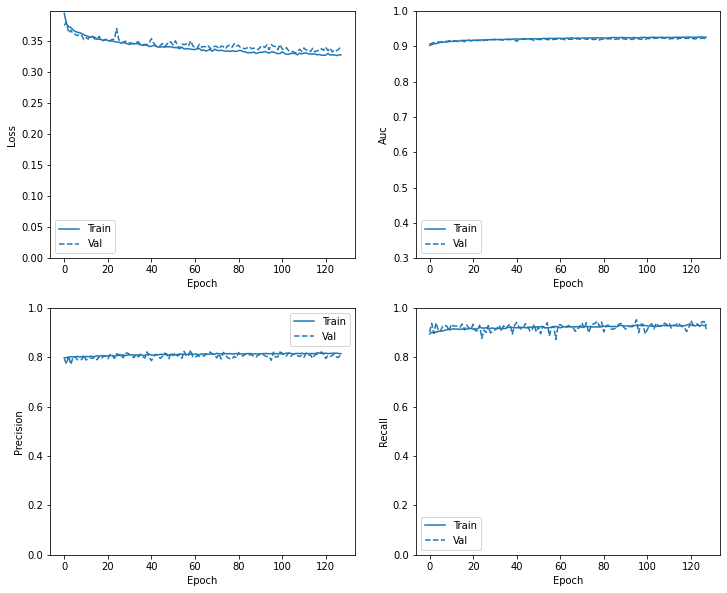

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.37902048230171204
tp :  1909.0
fp :  5201.0
tn :  18591.0
fn :  247.0
accuracy :  0.7900416254997253
precision :  0.2684950828552246
recall :  0.8854359984397888
auc :  0.9115262627601624

(True Negatives):  18591
 (False Positives):  5201
(False Negatives):  247
 (True Positives):  1909
Total Transactions:  2156


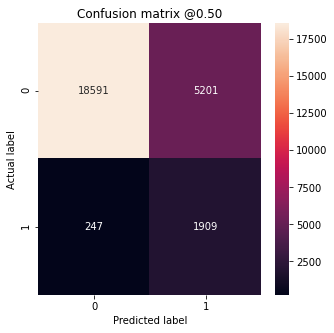

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# 1D CONV

In [ ]:
test_predictions_baseline

array([[0.0300644 ],
       [0.01908043],
       [0.12450388],
       ...,
       [0.46651354],
       [0.0501422 ],
       [0.0023756 ]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

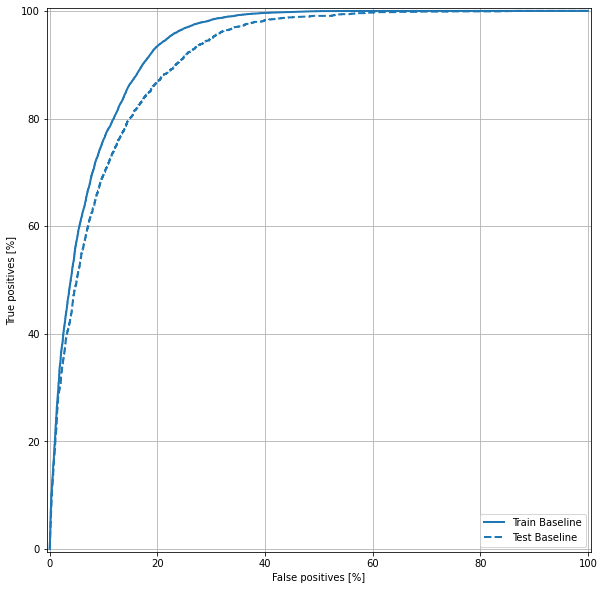

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/300
531/531 [==============================] - 8s 10ms/step - loss: 0.6911 - tp: 19345.9962 - fp: 10184.0883 - tn: 18241.9981 - fn: 8981.5113 - accuracy: 0.6669 - precision: 0.6583 - recall: 0.6902 - auc: 0.7391 - val_loss: 0.5689 - val_tp: 8803.0000 - val_fp: 4349.0000 - val_tn: 7070.0000 - val_fn: 2420.0000 - val_accuracy: 0.7010 - val_precision: 0.6693 - val_recall: 0.7844 - val_auc: 0.7772
Epoch 2/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5930 - tp: 12254.1692 - fp: 5807.2820 - tn: 11185.0019 - fn: 4865.1410 - accuracy: 0.6857 - precision: 0.6764 - recall: 0.7155 - auc: 0.7521 - val_loss: 0.5475 - val_tp: 8549.0000 - val_fp: 3578.0000 - val_tn: 7841.0000 - val_fn: 2674.0000 - val_accuracy: 0.7239 - val_precision: 0.7050 - val_recall: 0.7617 - val_auc: 0.7963
Epoch 3/300
531/531 [==============================] - 4s 8ms/step - loss: 0.5774 - tp: 12434.4530 - fp: 5574.5883 - tn: 11464.8853 - fn: 4637.6673 - accuracy: 0.6994 - precision: 0.6898 - rec

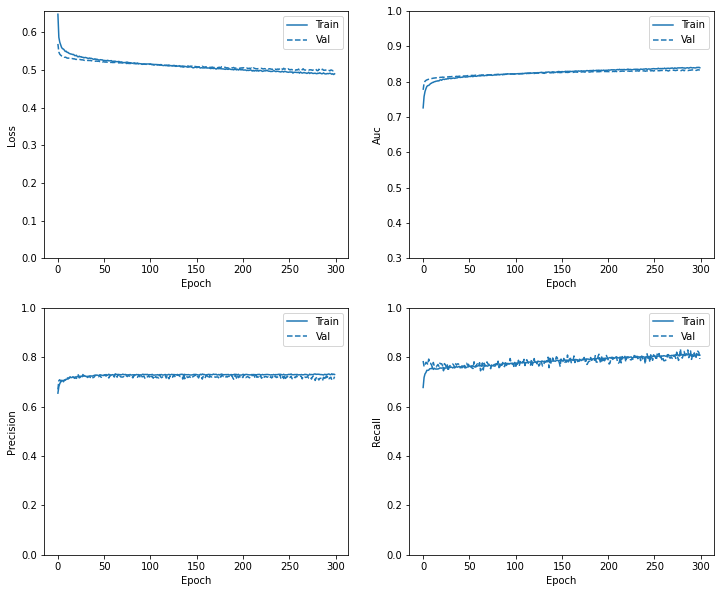

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_weighted = weighted_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.4981033205986023
tp :  8896.0
fp :  3444.0
tn :  7975.0
fn :  2327.0
accuracy :  0.7451196908950806
precision :  0.7209076285362244
recall :  0.7926579117774963
auc :  0.8337280750274658

(True Negatives):  7975
 (False Positives):  3444
(False Negatives):  2327
 (True Positives):  8896
Total Transactions:  11223


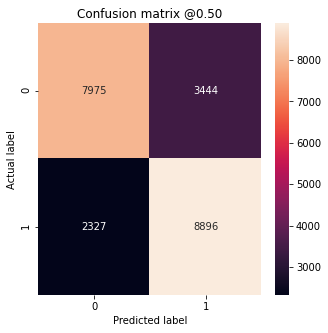

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_weighted)

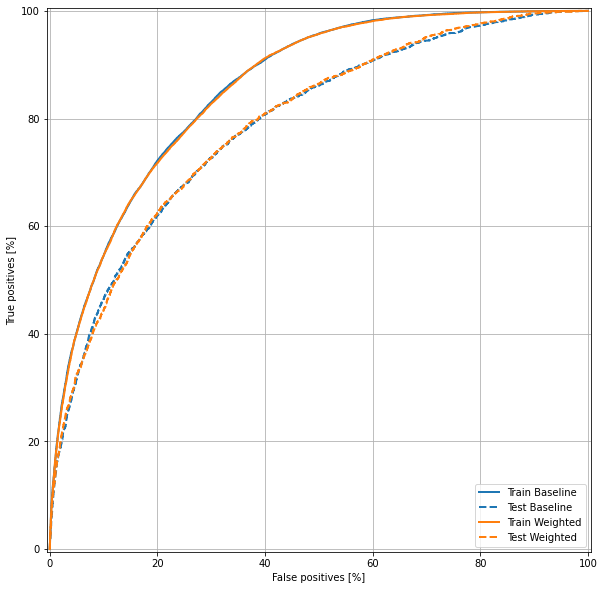

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(33864, 6, 1)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(67728, 6, 1)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [[-1.41463932]
 [-1.03407157]
 [-0.09692102]
 [ 0.93895215]
 [-0.24508446]
 [ 0.11068057]]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6, 1), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5546875


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

530.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/300
530/530 [==============================] - 8s 11ms/step - loss: 0.6947 - tp: 11682.1356 - fp: 10759.2222 - tn: 21390.7797 - fn: 7680.6215 - accuracy: 0.6443 - precision: 0.4883 - recall: 0.5927 - auc: 0.6998 - val_loss: 0.5705 - val_tp: 8869.0000 - val_fp: 4500.0000 - val_tn: 6919.0000 - val_fn: 2354.0000 - val_accuracy: 0.6973 - val_precision: 0.6634 - val_recall: 0.7903 - val_auc: 0.7745
Epoch 2/300
530/530 [==============================] - 5s 9ms/step - loss: 0.5924 - tp: 12275.5367 - fp: 5872.9115 - tn: 11091.1488 - fn: 4808.1620 - accuracy: 0.6860 - precision: 0.6778 - recall: 0.7194 - auc: 0.7520 - val_loss: 0.5478 - val_tp: 8535.0000 - val_fp: 3609.0000 - val_tn: 7810.0000 - val_fn: 2688.0000 - val_accuracy: 0.7219 - val_precision: 0.7028 - val_recall: 0.7605 - val_auc: 0.7955
Epoch 3/300
530/530 [==============================] - 4s 8ms/step - loss: 0.5757 - tp: 12430.2863 - fp: 5627.9831 - tn: 11375.9416 - fn: 4613.5480 - accuracy: 0.6988 - precision: 0.6896 - rec

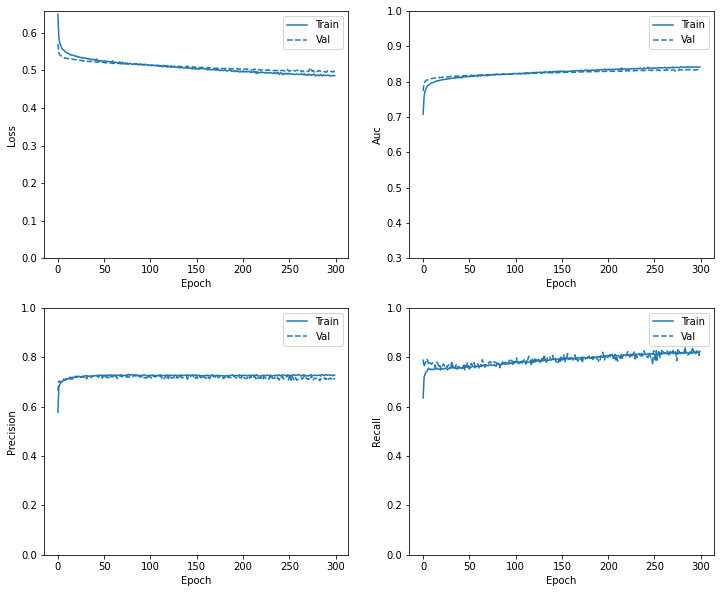

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/600
20/20 [==============================] - 4s 79ms/step - loss: 0.8108 - tp: 9618.0476 - fp: 4133.4286 - tn: 7994.5238 - fn: 2297.9048 - accuracy: 0.7328 - precision: 0.6995 - recall: 0.8076 - auc: 0.8206 - val_loss: 0.6972 - val_tp: 7965.0000 - val_fp: 8889.0000 - val_tn: 2530.0000 - val_fn: 3258.0000 - val_accuracy: 0.4635 - val_precision: 0.4726 - val_recall: 0.7097 - val_auc: 0.4552
Epoch 2/600
20/20 [==============================] - 1s 32ms/step - loss: 0.7430 - tp: 309.6667 - fp: 288.4762 - tn: 412.7619 - fn: 391.0000 - accuracy: 0.5152 - precision: 0.5273 - recall: 0.4430 - auc: 0.5329 - val_loss: 0.6902 - val_tp: 10341.0000 - val_fp: 10387.0000 - val_tn: 1032.0000 - val_fn: 882.0000 - val_accuracy: 0.5023 - val_precision: 0.4989 - val_recall: 0.9214 - val_auc: 0.5821
Epoch 3/600
20/20 [==============================] - 1s 33ms/step - loss: 0.7482 - tp: 355.6190 - fp: 276.6190 - tn: 386.8095 - fn: 382.8571 - accuracy: 0.5209 - precision: 0.5680 - recall: 0.4702 - auc:

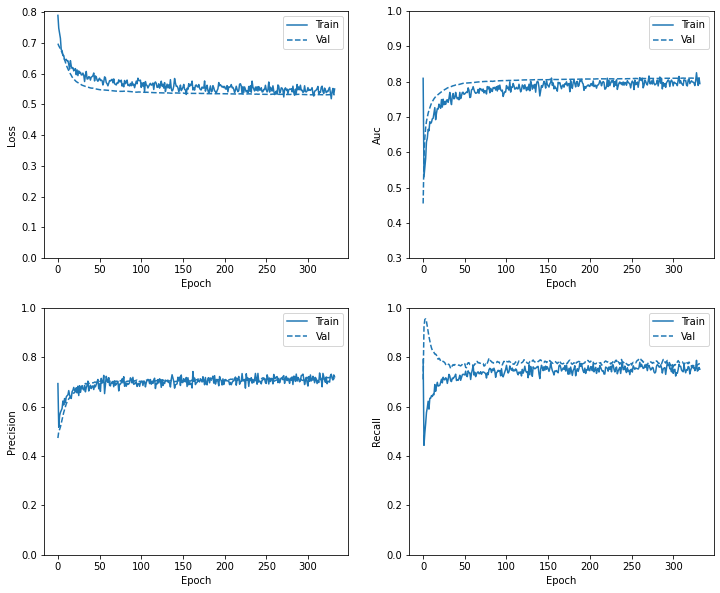

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5311693549156189
tp :  8702.0
fp :  3499.0
tn :  7920.0
fn :  2521.0
accuracy :  0.7341224551200867
precision :  0.7132202386856079
recall :  0.7753720283508301
auc :  0.810551643371582

(True Negatives):  7920
 (False Positives):  3499
(False Negatives):  2521
 (True Positives):  8702
Total Transactions:  11223


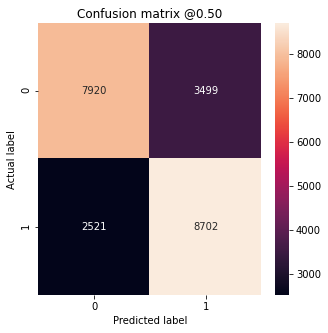

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

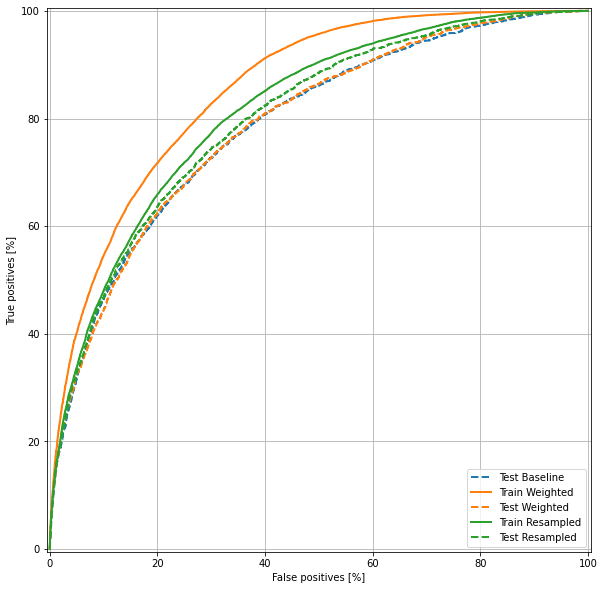

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# DNN


In [ ]:
df1.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               69.0  ...         0.0        0.0
4   4.0               72.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
df_test.head()

Week  Received Quantity  ...  Lost Sales  Stock Out
0   0.0                0.0  ...         0.0        0.0
1   1.0                0.0  ...         0.0        0.0
2   2.0                0.0  ...         0.0        0.0
3   3.0               79.0  ...         0.0        0.0
4   4.0               85.0  ...         0.0        0.0

[5 rows x 14 columns]

In [ ]:
X_train=df1.drop(labels=["Stock Out"],axis=1)
X_test =df_test.drop(labels=["Stock Out"],axis =1 )
y_train= df1['Stock Out'].values
y_test = df_test["Stock Out"].values


In [ ]:
print("shape of train set  set is {}".format(X_train.shape))
print("shape of test set  set is {}".format(X_test.shape))
print("shape of train labels  set is {}".format(y_train.shape))
print("shape of test labels  set is {}".format(y_test.shape))

shape of train set  set is (104052, 13)
shape of test set  set is (25948, 13)
shape of train labels  set is (104052,)
shape of test labels  set is (25948,)


- Remove Correlated filter

In [ ]:
X_train.columns

Index(['Week', 'Received Quantity', 'Previous Inventory',
       'Beginning Inventory', 'Customer Demand', 'Expected Demand',
       'Allocated/ Shipment Qunatity', 'End Inventory', 'On-Order Quantity',
       'Inventory Position', 'DFS Level', 'Order Placed', 'Lost Sales'],
      dtype='object')

In [ ]:
X_train=X_train.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis=1)
X_test =X_test.drop(labels=["Expected Demand","Order Placed","Allocated/ Shipment Qunatity","DFS Level"],axis =1 )


In [ ]:
X_train.head()

Week  Received Quantity  ...  Inventory Position  Lost Sales
0   0.0                0.0  ...                 0.0         0.0
1   1.0                0.0  ...               131.0         0.0
2   2.0                0.0  ...               125.0         0.0
3   3.0               69.0  ...               137.0         0.0
4   4.0               72.0  ...               109.0         0.0

[5 rows x 9 columns]

In [ ]:
X_train.shape

(104052, 9)

In [ ]:
X_test.shape

(25948, 9)

- Correlation


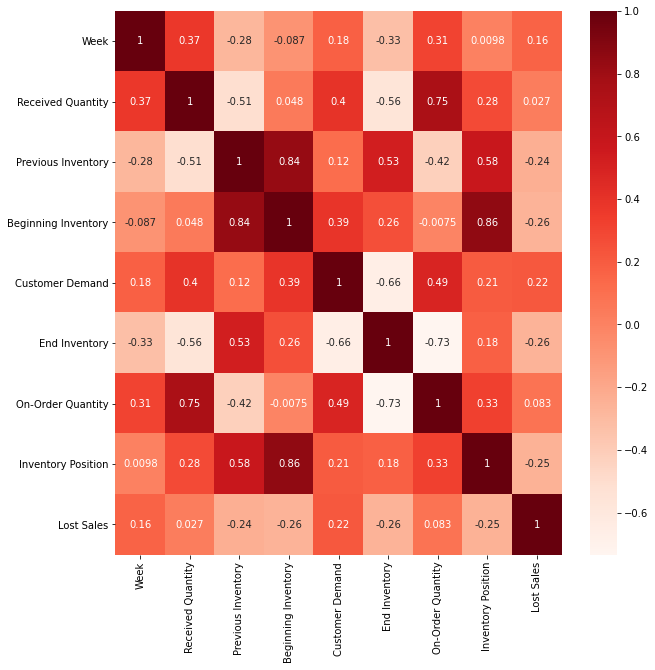

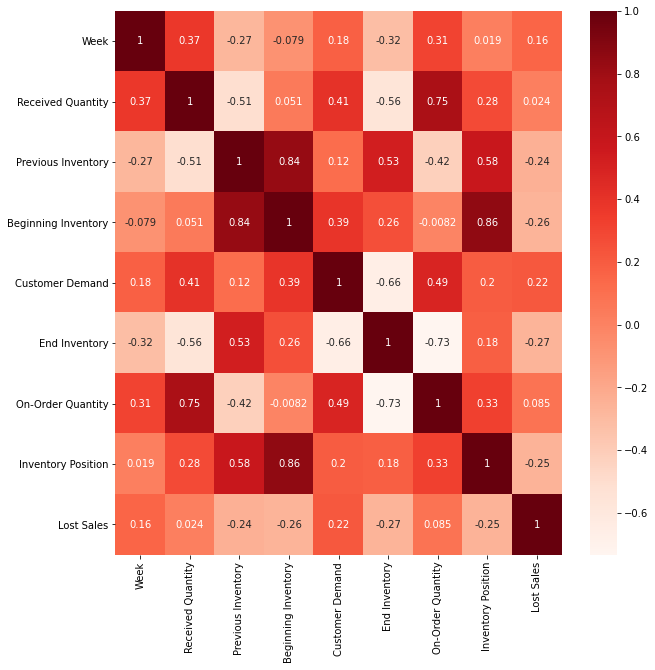

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(10,10))
cor = X_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 104052
    Positive: 8211 (7.89% of total)



In [ ]:
y_test = y_test.astype(int)
y_test=np.array(y_test).ravel()
ne, po = np.bincount(y_test)
tot = ne + po
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    tot, pos, 100 * pos / total))

Examples:
    Total: 25948
    Positive: 8211 (7.89% of total)



In [ ]:
!pip install imbalanced-learn

In [ ]:
	
# check version number
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from numpy import mean

In [ ]:
counter  =Counter(y_train)
print(counter)
counter_  =Counter(y_test)
counter_

Counter({0: 95841, 1: 8211})


Counter({0: 23792, 1: 2156})

OVER and Under Sampling pipeline

In [ ]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.2)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

OVER SAMPLING

In [ ]:
# transform the dataset
oversample = SMOTE(sampling_strategy=0.4)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 95841, 1: 38336})


UNDER SAMPLING

In [ ]:
under  = RandomUnderSampler()
X_train, y_train = under.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({0: 38336, 1: 38336})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.tail(10)

0
76662  1
76663  1
76664  1
76665  1
76666  1
76667  1
76668  1
76669  1
76670  1
76671  1

In [ ]:
X_train =pd.DataFrame(X_train)
X_train.tail(30)

0          1          2  ...          6           7          8
76642  19.585583  81.414417   0.000000  ...  85.585583   85.585583   5.585583
76643  40.765494  79.469013   0.765494  ...  80.000000   80.000000   4.234506
76644  24.580007  75.839987   1.160013  ...  82.839987   82.839987   0.000000
76645  33.475208  84.983472   2.000000  ...  82.000000   93.508264   0.000000
76646  22.000000  73.555157  17.000000  ...  81.224213   83.889685   0.000000
76647  24.000000  80.275116   0.000000  ...  83.275116   83.275116   2.724884
76648  24.562017  81.281008   7.000000  ...  78.718992   87.437983   0.000000
76649  28.247253  81.000000   6.000000  ...  80.752747   81.505494   0.494506
76650  43.211987  70.000000   0.000000  ...  86.817981   86.817981   4.394006
76651  27.163634  85.672731   0.000000  ...  84.163634   89.000000   0.000000
76652  29.446125  75.276938  30.723062  ...  75.446125   98.000000   0.000000
76653  31.556222  75.481259   0.000000  ...  84.518741   84.518741  11.518741
76654  24.604086  80.597276  10.201362  ...  81.201362   87.402724   0.000000
76655  41.500594  77.000000   0.000000  ...  88.000000   88.000000   9.001188
76656  32.718565  80.718565   6.562871  ...  79.718565   94.000000   0.000000
76657  46.840013  72.719996   0.000000  ...  84.280004   84.280004   3.000000
76658  31.469522  81.060956   0.000000  ...  86.000000   89.469522   0.000000
76659   9.318213  66.009072  40.009072  ...  77.654570  108.663643   0.000000
76660  23.307498  74.871665   8.564167  ...  76.743330   89.435833   0.000000
76661  30.108889  79.663334  20.227777  ...  82.554445   93.554445   0.000000
76662  37.707677  71.415354   0.000000  ...  79.707677   79.707677   3.292323
76663   5.955395  79.821580  51.821580  ...  70.267630   99.044605   0.000000
76664  16.857893  81.142107  16.000000  ...  80.786839   97.000000   0.000000
76665  32.448007  68.560008  44.775997  ...  75.887998  104.224003   0.000000
76666  11.215871  82.378839  20.810581  ...  76.405290  102.784129   0.000000
76667  29.656640  69.000000   0.328320  ...  75.015039   75.015039  10.000000
76668  48.359798  85.920606   0.000000  ...  86.000000   86.000000   3.359798
76669  13.000000  77.005556   1.988888  ...  88.005556   96.022224   0.000000
76670  44.000000  78.000000  12.444051  ...  78.222025   84.000000   0.000000
76671  43.908540  73.000000   0.000000  ...  78.454270   78.454270  10.545730

[30 rows x 9 columns]

In [ ]:
X_train.shape

(76672, 9)

In [ ]:
y_train = y_train.astype(int)
y_train=np.array(y_train).ravel()
neg, pos = np.bincount(y_train)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 76672
    Positive: 38336 (50.00% of total)



In [ ]:
train_df, val_df,train_labels,val_labels = train_test_split(X_train,y_train,test_size=0.1)
test_df  =X_test
test_labels = y_test

# Form np arrays of labels and features.

bool_train_labels = train_labels != 0
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
train_df.shape

(69004, 9)

In [ ]:
neg, pos = np.bincount(train_labels.ravel())
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 69004
    Positive: 34499 (50.00% of total)



In [ ]:
a=pd.DataFrame(bool_train_labels)
a.shape

(69004, 1)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (69004,)
Validation labels shape: (7668,)
Test labels shape: (25948,)
Training features shape: (69004, 9)
Validation features shape: (7668, 9)
Test features shape: (25948, 9)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
var_ratio={}
for n in range(2,9):
    pc=PCA(n_components=n)
    c=pc.fit(train_features)
    var_ratio[n]=sum(c.explained_variance_ratio_)

In [ ]:
var_ratio

{2: 0.6684066981310944,
 3: 0.7997793184420291,
 4: 0.8932105337806469,
 5: 0.9556575798420681,
 6: 0.9913327358768378,
 7: 0.9998698611366552,
 8: 0.9999888464956384}

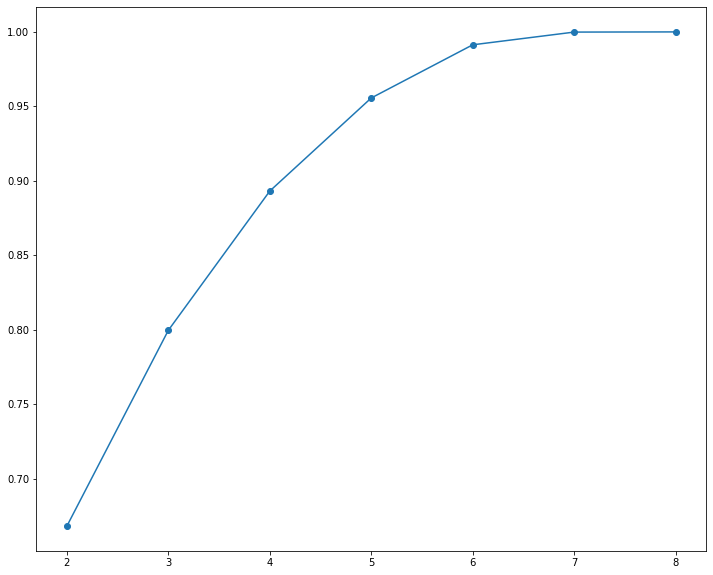

In [ ]:
pd.Series(var_ratio).plot(marker="o")

In [ ]:
pc=PCA(n_components=6)
train_features=pc.fit_transform(train_features)
train_features

array([[ 0.07322417, -0.04795704, -0.62696727, -0.60212279, -0.05677223,
         0.14948957],
       [-1.71096863, -0.02542433,  1.83603574,  0.07069637,  0.24248222,
        -0.93012613],
       [-1.38374568,  0.02272704,  0.88799447, -0.99742688,  0.44961176,
        -0.36349155],
       ...,
       [-0.19151306, -0.21511375,  1.06225665, -0.52621453, -0.13359615,
        -0.02635708],
       [-0.9750062 , -0.02658404,  0.68514961, -1.11969613,  0.36499536,
        -0.06600796],
       [ 0.85048686,  0.36267291,  0.73607042, -1.21911692,  0.03603136,
         0.21328652]])

In [ ]:
val_features=pc.transform(val_features)
test_features=pc.transform(test_features)

In [ ]:
train_features=pd.DataFrame(train_features)
train_features

0         1         2  ...         6         7         8
0     -0.591035  0.349203 -0.807008  ...  0.454206 -0.689433  1.316965
1      0.860060  0.349203 -0.150058  ... -0.090425  0.139985 -0.401662
2     -0.650604  0.895028 -0.051516  ...  0.463272  0.552331 -0.401662
3      0.575078  0.556508 -0.807008  ...  0.540852 -0.273153 -0.401662
4      0.074005  0.071315 -0.807008  ...  0.225973 -0.808411  0.258487
...         ...       ...       ...  ...       ...       ...       ...
68999 -0.794477  0.758572  0.868214  ... -0.248624  1.871838 -0.401662
69000 -1.585778  0.690343  0.211264  ...  0.384172 -0.107423 -0.401662
69001  0.764424 -0.196623 -0.565872  ... -0.538962 -0.890880 -0.401662
69002 -0.925714  0.068300 -0.381914  ...  0.230604 -0.354830 -0.401662
69003 -1.441905  0.144518  0.769672  ... -0.406823  0.428627 -0.401662

[69004 rows x 9 columns]

In [ ]:

pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_features.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_features.columns)

# sns.jointplot(pos_df['Order Placed'], pos_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# plt.suptitle("Positive distribution")

# sns.jointplot(neg_df['Order Placed'], neg_df['Received Quantity'],
#               kind='hex', xlim=(-5,5), ylim=(-5,5))
# _ = plt.suptitle("Negative distribution")

In [ ]:
pos_df.shape

(34499, 9)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
        11, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(8,activation="relu"),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(6,activation="relu"),
      keras.layers.Dense(4,activation="tanh"),
      keras.layers.Dense(2,activation="sigmoid"),
      keras.layers.Dropout(0.2),

      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=0.0005),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 200
BATCH_SIZE = 256

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 11)                110       
_________________________________________________________________
dropout_112 (Dropout)        (None, 11)                0         
_________________________________________________________________
dense_159 (Dense)            (None, 8)                 96        
_________________________________________________________________
dropout_113 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_160 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_114 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_161 (Dense)            (None, 8)               

In [ ]:
model.predict(train_features[:10])

array([[0.76990104],
       [0.77179646],
       [0.77039444],
       [0.76898706],
       [0.77251637],
       [0.7709359 ],
       [0.77043045],
       [0.78981155],
       [0.76839423],
       [0.7739339 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8697


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-0.0001739])

In [ ]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.46635535],
       [0.4731044 ],
       [0.47132123],
       [0.46818423],
       [0.46811453],
       [0.47297233],
       [0.4708831 ],
       [0.47317457],
       [0.46749115],
       [0.4714416 ]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6980


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

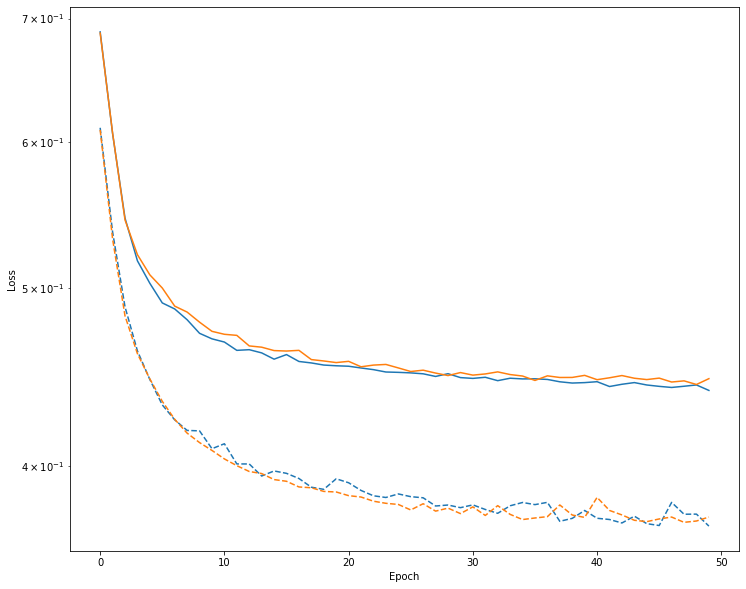

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(test_features, test_labels))

Epoch 1/200
270/270 [==============================] - 5s 8ms/step - loss: 0.7034 - tp: 7396.8819 - fp: 4537.7380 - tn: 16781.4465 - fn: 13766.1328 - accuracy: 0.5900 - precision: 0.6398 - recall: 0.3850 - auc: 0.6676 - val_loss: 0.5736 - val_tp: 1835.0000 - val_fp: 5202.0000 - val_tn: 18590.0000 - val_fn: 321.0000 - val_accuracy: 0.7872 - val_precision: 0.2608 - val_recall: 0.8511 - val_auc: 0.8770
Epoch 2/200
270/270 [==============================] - 1s 4ms/step - loss: 0.6273 - tp: 13185.9815 - fp: 7036.0221 - tn: 10378.6015 - fn: 4213.5941 - accuracy: 0.6726 - precision: 0.6484 - recall: 0.7564 - auc: 0.7140 - val_loss: 0.5239 - val_tp: 1878.0000 - val_fp: 5324.0000 - val_tn: 18468.0000 - val_fn: 278.0000 - val_accuracy: 0.7841 - val_precision: 0.2608 - val_recall: 0.8711 - val_auc: 0.8585
Epoch 3/200
270/270 [==============================] - 1s 4ms/step - loss: 0.5568 - tp: 13503.7970 - fp: 6458.6310 - tn: 10913.0406 - fn: 3938.7306 - accuracy: 0.7004 - precision: 0.6764 - recal

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.3,1])
    else:
      plt.ylim([0,1])

    plt.legend()

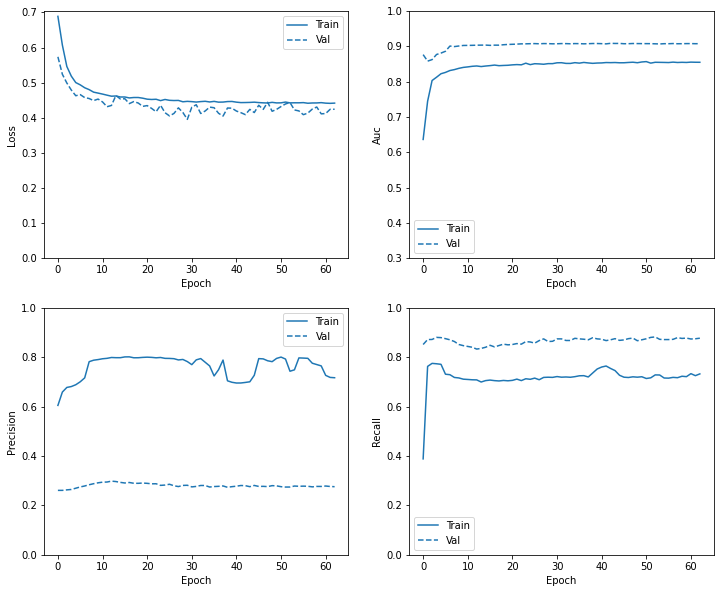

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels, predictions, p=0.46):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('(True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print(' (True Positives): ', cm[1][1])
  print('Total Transactions: ', np.sum(cm[1]))

loss :  0.4090035855770111
tp :  1876.0
fp :  4830.0
tn :  18962.0
fn :  280.0
accuracy :  0.803067684173584
precision :  0.27974948287010193
recall :  0.8701298832893372
auc :  0.9089685678482056

(True Negatives):  17586
 (False Positives):  6206
(False Negatives):  163
 (True Positives):  1993
Total Transactions:  2156


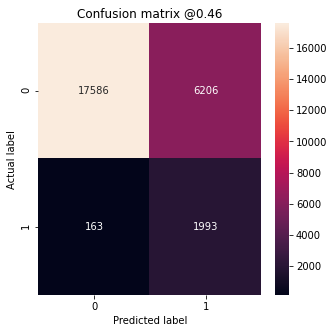

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=35, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

# DNN

In [ ]:
test_predictions_baseline

array([[0.18966809],
       [0.4776491 ],
       [0.62751967],
       ...,
       [0.60885984],
       [0.4531247 ],
       [0.40109062]], dtype=float32)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,100.5])
  plt.ylim([-0.5,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

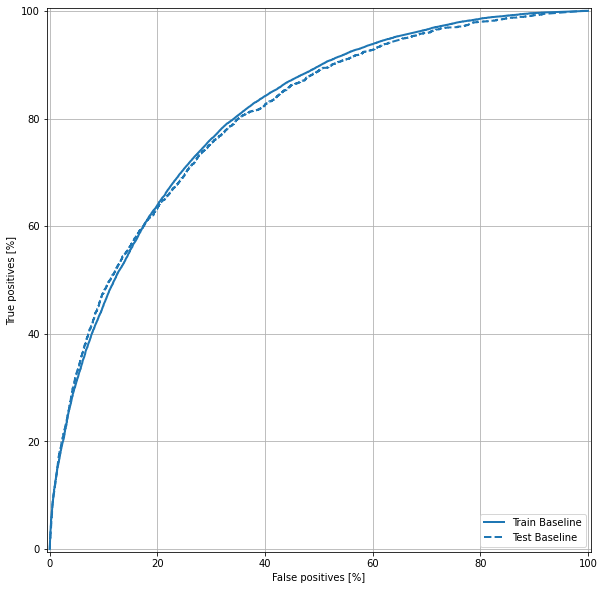

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.00
Weight for class 1: 1.00


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/200
298/298 [==============================] - 5s 6ms/step - loss: 0.6969 - tp: 16793.1171 - fp: 14113.7324 - tn: 9344.4181 - fn: 6599.4515 - accuracy: 0.5677 - precision: 0.5539 - recall: 0.7235 - auc: 0.6206 - val_loss: 0.6619 - val_tp: 2890.0000 - val_fp: 1327.0000 - val_tn: 2913.0000 - val_fn: 1323.0000 - val_accuracy: 0.6865 - val_precision: 0.6853 - val_recall: 0.6860 - val_auc: 0.7370
Epoch 2/200
298/298 [==============================] - 1s 3ms/step - loss: 0.6704 - tp: 10991.2609 - fp: 7119.2876 - tn: 12035.2809 - fn: 8251.8896 - accuracy: 0.5972 - precision: 0.6053 - recall: 0.5693 - auc: 0.6399 - val_loss: 0.6341 - val_tp: 3157.0000 - val_fp: 1461.0000 - val_tn: 2779.0000 - val_fn: 1056.0000 - val_accuracy: 0.7022 - val_precision: 0.6836 - val_recall: 0.7493 - val_auc: 0.7484
Epoch 3/200
298/298 [==============================] - 1s 4ms/step - loss: 0.6455 - tp: 11657.1873 - fp: 7001.8763 - tn: 12169.8763 - fn: 7568.7793 - accuracy: 0.6200 - precision: 0.6246 - recal

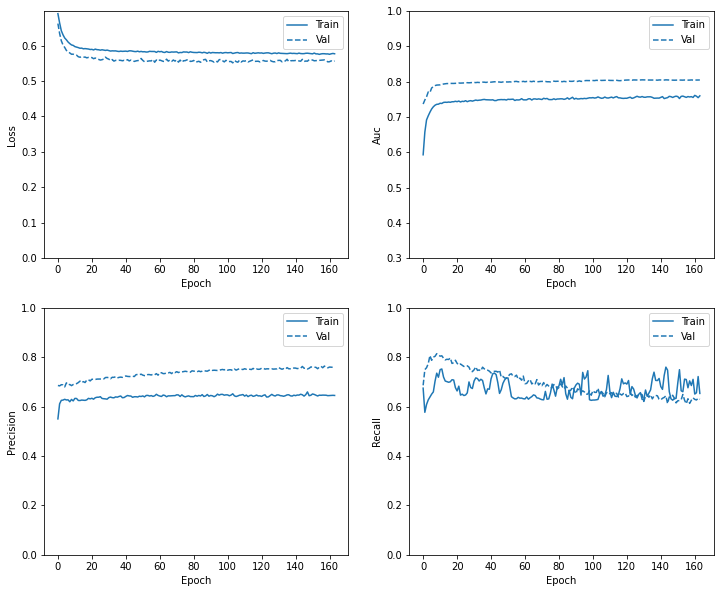

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_baseline = model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5556675791740417
tp :  2711.0
fp :  879.0
tn :  3361.0
fn :  1502.0
accuracy :  0.7183248400688171
precision :  0.7551531791687012
recall :  0.6434844732284546
auc :  0.8055305480957031

(True Negatives):  3381
 (False Positives):  859
(False Negatives):  1526
 (True Positives):  2687
Total Transactions:  4213


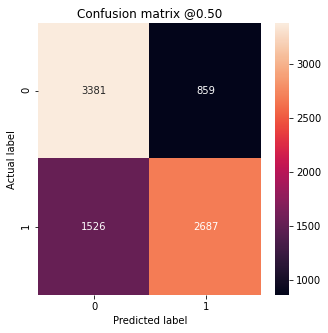

In [ ]:
weighted_results = weighted_model.evaluate(val_features, val_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_baseline)

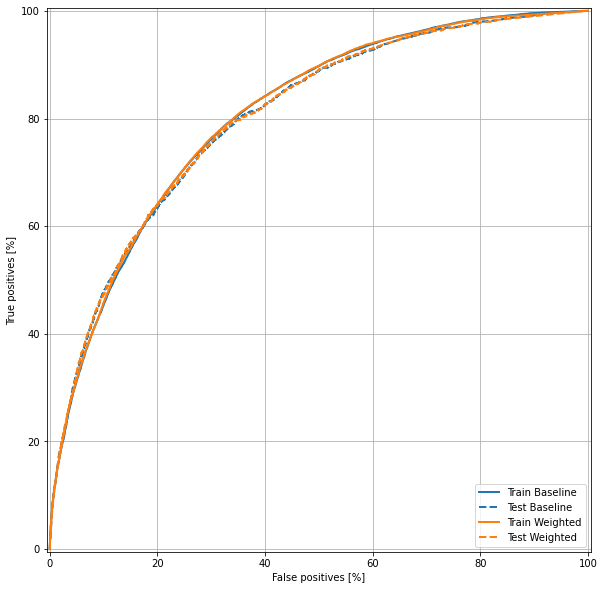

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = (np.array(pos_features)[choices])
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(38024, 6)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(76048, 6)

In [ ]:
BUFFER_SIZE = 20000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 3.54921003 -0.62483459 -2.17698193  0.06235498  1.56902391  0.84214184]

Label:  1


In [ ]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_ds

<PrefetchDataset shapes: ((None, 6), (None,)), types: (tf.float64, tf.int64)>

In [ ]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5078125


In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

298.0

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/200
298/298 [==============================] - 4s 8ms/step - loss: 0.6959 - tp: 16066.3913 - fp: 16828.1940 - tn: 17443.1639 - fn: 5526.3946 - accuracy: 0.6156 - precision: 0.4744 - recall: 0.7470 - auc: 0.6845 - val_loss: 0.6614 - val_tp: 2856.0000 - val_fp: 1273.0000 - val_tn: 2967.0000 - val_fn: 1357.0000 - val_accuracy: 0.6889 - val_precision: 0.6917 - val_recall: 0.6779 - val_auc: 0.7363
Epoch 2/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6685 - tp: 11092.9130 - fp: 7005.7759 - tn: 12187.0769 - fn: 8113.3779 - accuracy: 0.6048 - precision: 0.6133 - recall: 0.5730 - auc: 0.6459 - val_loss: 0.6332 - val_tp: 3115.0000 - val_fp: 1415.0000 - val_tn: 2825.0000 - val_fn: 1098.0000 - val_accuracy: 0.7027 - val_precision: 0.6876 - val_recall: 0.7394 - val_auc: 0.7401
Epoch 3/200
298/298 [==============================] - 1s 5ms/step - loss: 0.6466 - tp: 11546.4348 - fp: 7022.5853 - tn: 12212.3278 - fn: 7617.7960 - accuracy: 0.6180 - precision: 0.6212 - reca

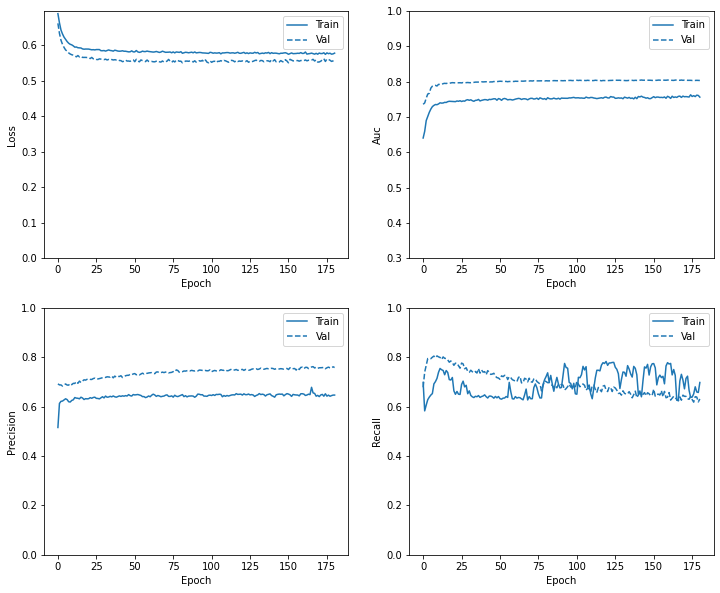

In [ ]:
plot_metrics(resampled_history)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=2*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/400
20/20 [==============================] - 3s 53ms/step - loss: 0.7012 - tp: 3800.4762 - fp: 1968.9524 - tn: 3654.0952 - fn: 1833.2857 - accuracy: 0.6654 - precision: 0.6667 - recall: 0.6721 - auc: 0.7492 - val_loss: 0.6930 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.5891
Epoch 2/400
20/20 [==============================] - 0s 9ms/step - loss: 0.7003 - tp: 1156.9524 - fp: 1081.9524 - tn: 275.6667 - fn: 289.2381 - accuracy: 0.5135 - precision: 0.5222 - recall: 0.7999 - auc: 0.5082 - val_loss: 0.6914 - val_tp: 4213.0000 - val_fp: 4240.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.4984 - val_precision: 0.4984 - val_recall: 1.0000 - val_auc: 0.6445
Epoch 3/400
20/20 [==============================] - 0s 10ms/step - loss: 0.6989 - tp: 1103.0000 - fp: 1108.3810 - tn: 290.0000 - fn: 302.4286 - accuracy: 0.4965 - precision: 0.4952 - recall: 0.7874 

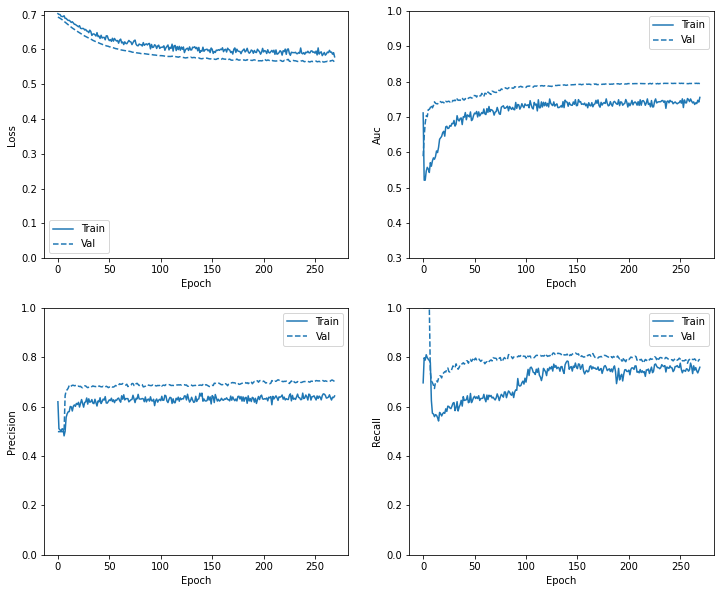

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)
val_predictions_resampled = resampled_model.predict(val_features, batch_size=BATCH_SIZE)

loss :  0.5651955604553223
tp :  3353.0
fp :  1441.0
tn :  2799.0
fn :  860.0
accuracy :  0.7277889251708984
precision :  0.699415922164917
recall :  0.7958699464797974
auc :  0.7958680391311646

(True Negatives):  2799
 (False Positives):  1441
(False Negatives):  860
 (True Positives):  3353
Total Transactions:  4213


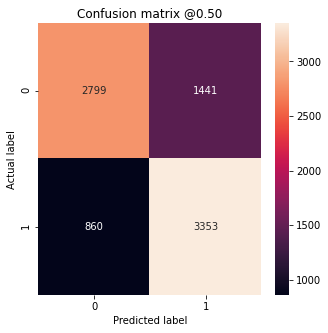

In [ ]:
resampled_results = resampled_model.evaluate(val_features, val_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(val_labels, val_predictions_resampled)

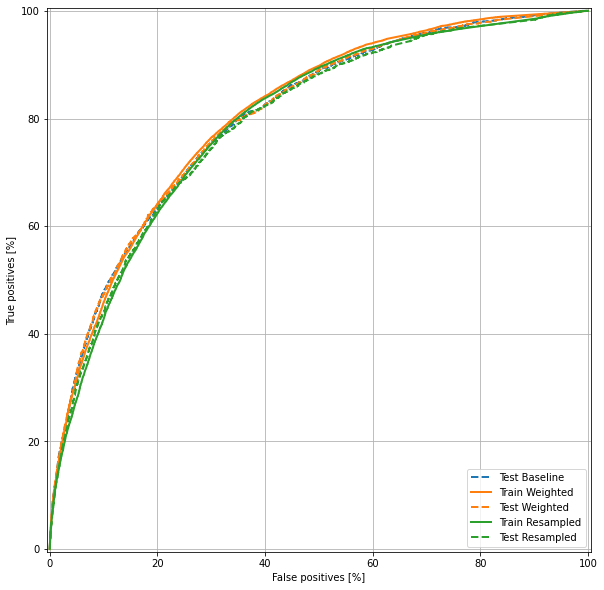

In [ ]:

# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')